#     Estimating Counterfactual Energy Usage of Buildings with Machine Learning
<p> 
    
##    `Part-3-Conquer.ipynb`

<p>
    
### by:  Steven Smiley

# Table of Contents (TOC)

* [0. Overall Purpose](#Code_Objective_0)
    * [0.1 Acknowledgments ](#Code_Objective_0_1)
    * [0.2 Background](#Code_Objective_0_2)
    * [0.3 References](#Code_Objective_0_3)
<p>
    
## Divide     
* [ `1. Part-1-Divide.ipynb`](#Code_Objective_1)<p> *Divide Data* into 16 datasets based on their `Site ID` <p>

    * [1.1: Import Libraries](#Code_Objective_1_1)
    * [1.2: Make Directories for Output Files](#Code_Objective_1_2)
    * [1.3: Import and View Data](#Code_Objective_1_3)
    * [1.4: Reduce Data Memory](#Code_Objective_1_4)
    * [1.5: Merge Data](#Code_Objective_1_5)
    * [1.6: Look at Data](#Code_Objective_1_6)
    * [1.7: Divide and Export Data](#Code_Objective_1_7)

<p>
    
## And    
* [ `2. Part-2-And.ipynb` ](#Code_Objective_2)<p> 
    *Exploratory Data Analysis* and *Cleaning* for each `Site ID`, <p> 
    repeat for all 16 sites ( `Split_Number_i` =1 to 16) <p>

    * [2.1: Split_Number_i](#Code_Objective_2_1)
    * [2.2: Import Libraries](#Code_Objective_2_2)
    * [2.3: Gather Directories for Output Files](#Code_Objective_2_3)
    * [2.4: Import and View Data for Split_Number_i](#Code_Objective_2_4)
    * [2.5: Reduce Data Memory](#Code_Objective_2_4)
    * [2.6: Units](#Code_Objective_2_6)
    * [2.7: Upsample](#Code_Objective_2_7)
        * [2.7.1: resample('H').mean()](#Code_Objective_2_7_1)
        * [2.7.2: missing_table()](#Code_Objective_2_7_2)
        * [2.7.3: dropna()](#Code_Objective_2_7_3)
        * [2.7.4: fillna()](#Code_Objective_2_7_4)
        * [2.7.5: interpolate()](#Code_Objective_2_7_5)
        * [2.7.6: pad()](#Code_Objective_2_7_6)
        * [2.7.7: bfill()](#Code_Objective_2_7_6)
        * [2.7.7: fillna()](#Code_Objective_2_7_7)
    * [2.8: Look for Outliers](#Code_Objective_2_8)
        * [2.8.1: Drop Meter Readings with High Values](#Code_Objective_2_8_1)
        * [2.8.2: Drop Meter Readings with Zero Values](#Code_Objective_2_8_2)
    * [2.9: Verify Clean Data Before Export](#Code_Objective_2_9)
    * [2.10: Export Clean Data](#Code_Objective_2_10)
    
## Conquer
* [ `3. Part-3-Conquer.ipynb` ](#Code_Objective_3)<p> 
    *Feature Engineering*, *Feature Extraction*, and *Machine Learning* with Training, Validation and Testing for each `Site ID`, <p> 
    repeat for all 16 sites ( `Split_Number_i` =1 to 16) <p>

    * [3.1: Split_Number_i](#Code_Objective_3_1)
    * [3.2: run_type](#Code_Objective_3_2)
        * [3.2.1: FE_type](#Code_Objective_3_2_1)
    * [3.3: Import Libraries](#Code_Objective_3_3)
    * [3.4: Gather Directories for Output Files](#Code_Objective_3_4)
    * [3.5: Import and View Data for Split_Number_i](#Code_Objective_3_5)
    * [3.6: Split the Data for Training and Testing](#Code_Objective_3_6)
    * [3.7: Reduce Data Memory](#Code_Objective_3_7)
    * [3.8: Feature Engineering and Feature Extraction](#Code_Objective_3_8)
    * [3.9: Machine Learning](#Code_Objective_3_9)
        * [3.9.1: Machine Learning: Light GBM: K-fold Train/Val](#Code_Objective_3_9_1)
        * [3.9.2: Machine Learning: Light GBM: Prediction with Test](#Code_Objective_3_9_2)
        * [3.9.3: Machine Learning: Light GBM: Feature Importance Plot](#Code_Objective_3_9_3)
    * [3.10: Statistical Analysis of Results](#Code_Objective_3_10)
        * [3.10.1: Regression Plot of Prediction vs. Actual](#Code_Objective_3_10_1)
        * [3.10.2: Bland-Altman Plot of Prediction vs. Actual](#Code_Objective_3_10_2)
    * [3.11: Counterfactual Energy Estimation Scatter Plots](#Code_Objective_3_10)
        * [3.11.1: Counterfactual Energy Estimation Building Plots by Meter](#Code_Objective_3_11_1)
        * [3.11.2: Counterfactual Energy Estimation Plots by Meter](#Code_Objective_3_11_2)
    * [3.12: Export Models](#Code_Objective_3_12)
    * [3.13: Predict on Unknown Future Test Data](#Code_Objective_3_13)
    * [3.14: Export Final Results for Site ID](#Code_Objective_3_14)
        
        
    
    
## All Site Ids
* [ `4. Part-4-AllSiteIds.ipynb` ](#Code_Objective_4)<p> 
    Combines all 16 `Site IDs` results for submission and makes counterfactual energy estimation figures. <p> 

    * [4.1: Import Libraries](#Code_Objective_4_1)
    * [4.2: Gather Directories for Output Files](#Code_Objective_4_2)
    * [4.3: Import and Combine Data for each Split_Number_i for Final Submission](#Code_Objective_4_3)
    * [4.4: Reduce Data Memory](#Code_Objective_4_4)
    * [4.5: Export Final Submission Results](#Code_Objective_4_5)
    * [4.6: Counterfactual Energy Estimation Plots for all Results](#Code_Objective_4_6)

# Conquer
# 3.  `Part-3-Conquer.ipynb` <a class="anchor" id="Code_Objective_3_0"></a>

## 3.1 Split_Number_i <a class="anchor" id="Code_Objective_3_1"></a>

In [1]:
Split_Number_i = 15

## 3.2 run_type  <a class="anchor" id="Code_Objective_3_2"></a>

In [2]:
# run_type allows me to run the script Hyperparameter Training, Base or the Actual Best Run
#run_type = 'Hyperparameter Training on Daily Data'
#run_type = 'Actual'
run_type = 'Final-run-r0 LightGBM 1-29-2020'

### 3.2.1 FE_type <a class="anchor" id="Code_Objective_3_2_1"></a>

In [3]:
#FE_type = 'On'
FE_type = 'On'

## 3.3 Import Libraries: <a class="anchor" id="Code_Objective_3_3"></a>

In [4]:
## Algorithms
#0 
import lightgbm as lgb

#1
from sklearn.ensemble import GradientBoostingRegressor

#2
from sklearn.ensemble import RandomForestRegressor

#3
import xgboost as xgb

#4 
from sklearn.ensemble import ExtraTreesRegressor

#5
from sklearn.linear_model import LogisticRegression


## Sklearn
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.utils.multiclass import unique_labels
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import roc_curve, auc #plot_roc_curve
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold
from sklearn import metrics

## Plotting
import matplotlib.pyplot as plt
import seaborn as sns

## Pandas
import pandas as pd # data processing, CSV file I/O (e.i. pd.read_csv)

## Numpy
import numpy as np

## Misc
import warnings
import os # Get Current Directory
import joblib
from time import time
from scipy import stats
import itertools
import subprocess
import gc
import scipy

### Hide Warnings

In [5]:
warnings.filterwarnings("ignore")
pd.set_option('mode.chained_assignment', None)

### Get Current Directory

In [6]:
currentDirectory=os.getcwd()
#print(currentDirectory)

## 3.4 Gather Directories for Output Files <a class="anchor" id="Code_Objective_3_4"></a>

#### Function: folder_path

In [7]:
def folder_path(path):
    try:
        os.mkdir(path)
    except OSError:
        return(path)
    else:
        return(path)
    return(path)

In [8]:
default_path = '/Volumes/Data/BigData/ASHRAE/Inputs/ashrae-energy-prediction/'
OUTPUT_path = '/Volumes/Data/BigData/ASHRAE/'
OUTPUT_path = OUTPUT_path+'Outputs/'

In [9]:
Splits =['Site_ID_0',
         'Site_ID_1',
         'Site_ID_2',
         'Site_ID_3',
         'Site_ID_4',
         'Site_ID_5',
         'Site_ID_6',
         'Site_ID_7',
         'Site_ID_8',
         'Site_ID_9',
         'Site_ID_10',
         'Site_ID_11',
         'Site_ID_12',
         'Site_ID_13',
         'Site_ID_14',
         'Site_ID_15']

In [10]:
OUTPUT_split_path = [None]*len(Splits)
models_path = [None]*len(Splits)
figures_path = [None]*len(Splits)
count=0
for Split_Number in list(Splits):   
    # OUTPUTS: Folder for storing OUTPUTS
    print(Split_Number)
    folder_path(OUTPUT_path)
    OUTPUT_split_path[count]=folder_path(OUTPUT_path+Split_Number)
    # Models: Folder for storing models
    models_path[count]=folder_path(OUTPUT_split_path[count]+'/Models')
    # Figures: Folder for storing figures
    figures_path[count]=folder_path(OUTPUT_split_path[count]+'/Figures')
    count+=1

Site_ID_0
Site_ID_1
Site_ID_2
Site_ID_3
Site_ID_4
Site_ID_5
Site_ID_6
Site_ID_7
Site_ID_8
Site_ID_9
Site_ID_10
Site_ID_11
Site_ID_12
Site_ID_13
Site_ID_14
Site_ID_15


## 3.5 Import and View Data for Split_Number_i: <a class="anchor" id="Code_Objective_3_5"></a>

### Open Directories for Input Files

#### Function: file_loader

In [11]:
def file_loader(file_path): 
    try:
        data= pd.read_pickle(file_path)
    except OSError:
        print ("Trouble Loading: ",file_path)
    else:
        print ("Successfully loaded Input file: ",file_path)
    return data

In [12]:
count=0
for Split_Number in list(Splits):  
    if count == Split_Number_i:
        train_i = os.path.join(OUTPUT_split_path[count],
                               'site_id-{}-data_train_clean.pkl'.format(count))
        train = file_loader(train_i)
        
        test_i = os.path.join(OUTPUT_split_path[count],
                              'site_id-{}-data_test_clean.pkl'.format(count))
        test = file_loader(test_i)
    count+=1

Successfully loaded Input file:  /Volumes/Data/BigData/ASHRAE/Outputs/Site_ID_15/site_id-15-data_train_clean.pkl
Successfully loaded Input file:  /Volumes/Data/BigData/ASHRAE/Outputs/Site_ID_15/site_id-15-data_test_clean.pkl


## 3.6 Split the Data for Training and Testing <a class="anchor" id="Code_Objective_3_6"></a>

### Split the data by month so testing is done on:

#### --- Winter - Starts 
12 = December <p> 
 1 = January ; `testing` <p>
 2 = February <p>
### ---- Spring - Starts
 3 = March <p>
 4 = April ; `testing` <p>
 5 = May <p>
### ---- Summer - Starts
 6 = June <p>
 7 = July ; `testing` <p>
 8 = August  <p>
### ---- Fall - Starts 
 9 = September <p>
10 = October ; `testing` <p>
11 = November <p>

### Split the Data

In [13]:
len(train)

2049515

In [14]:
final_test = test

test = train[(train['timestamp'].dt.month.isin([1,4,7,10]))]

train_w, test = train_test_split(test,test_size=.50,random_state=42)

train = train[(train['timestamp'].dt.month.isin([2,3,5,6,8,9,11,12]))]

train=pd.concat([train,train_w],axis=0)

In [15]:
len(train)+len(test)

2049515

In [16]:
print('Training with ',round(100*len(train)/(len(train)+len(test))),'% of the original training data')

Training with  83 % of the original training data


In [17]:
print('Testing with ',round(100*len(test)/(len(train)+len(test))),'% of the original training data')

Testing with  17 % of the original training data


In [18]:
print('Final Testing with 100 % of the original testing data')

Final Testing with 100 % of the original testing data


## 3.7 Reduce Data Memory <a class="anchor" id="Code_Objective_3_7"></a>

This function comes from [CeasarLupum](https://www.kaggle.com/caesarlupum/ashrae-start-here-a-gentle-introduction) [[Ref. 11]](#Ref_11)
Please go and give him some upvotes! This is an excellent function to reduce memory for our problem.

In [19]:
## Function to reduce the DF size
def reduce_mem_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2    
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)    
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose: print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

## 3.8. Feature Engineering<a class="anchor" id="Code_Objective_3_8"></a>

In [20]:
def feature_engineering(data):
    # Sort by timestamp
    data.sort_values("timestamp")
    data.reset_index(drop=True)

    ## Add more features
    # time
    data["timestamp"] = pd.to_datetime(data["timestamp"],format="%Y-%m-%d")
    data["hour"] = data["timestamp"].dt.hour
    data["week"] = data["timestamp"].dt.week
    data["month"] = data["timestamp"].dt.month
    data["weekday"] = data["timestamp"].dt.weekday
    
    # Sensible Heat
    data['Sensible_Heat'] = 0.5274*(10.**(-4.))*data['square_feet']*(75.-data['air_temperature'])


    
    for name in list(data):
        if name == "square_feet":
            # square_feet, because distribution is not normal, it is right skewed
            data['log_square_feet'] =  np.log(data['square_feet'])
            #data.drop(['square_feet'],axis=1,inplace=True) 
    
    for name in list(data): 
        if name == "floor_count":
            # floor_count, because distribution is not normal, it is right skewed
            data['log_floor_count'] =  np.log(data['floor_count'])
            #data.drop(['floor_count'],axis=1,inplace=True) 
    
    
    for name in list(data):
        if name == 'dew_temperature':
            # dew_temperature, because distribution is not normal, it is left skewed
            data['square_dew_temperature'] =  np.square(data['dew_temperature'])
    

    # Holidays
    holidays = ["2016-01-01", "2016-01-18", "2016-02-15", "2016-05-30", "2016-07-04",
            "2016-09-05", "2016-10-10", "2016-11-11", "2016-11-24", "2016-12-26",
            "2017-01-01", "2017-01-16", "2017-02-20", "2017-05-29", "2017-07-04",
            "2017-09-04", "2017-10-09", "2017-11-10", "2017-11-23", "2017-12-25",
            "2018-01-01", "2018-01-15", "2018-02-19", "2018-05-28", "2018-07-04",
            "2018-09-03", "2018-10-08", "2018-11-12", "2018-11-22", "2018-12-25",
            "2019-01-01"]
    data["is_holiday"] = (data.timestamp.dt.date.astype("str").isin(holidays)).astype(int)
       
    
    return data 

In [21]:
train

building_id  meter  site_id  primary_use  square_feet  \
0               1325      0       15            1       155177   
1               1325      0       15            1       155177   
2               1325      0       15            1       155177   
3               1325      0       15            1       155177   
4               1325      0       15            1       155177   
...              ...    ...      ...          ...          ...   
815087          1364      2       15            9        74922   
1135329         1382      1       15            6       243072   
409907          1344      2       15            0       125507   
2101457         1443      0       15            0        40311   
379208          1343      1       15            5       110380   

                  timestamp  meter_reading  year_built  air_temperature  \
0       2016-09-29 14:00:00      10.500000      1915.0        55.031250   
1       2016-09-29 15:00:00      13.273438      1915.0        55.031250   
2       2016-09-29 16:00:00      15.828125      1915.0        55.937500   
3       2016-09-29 17:00:00      15.976562      1915.0        57.000000   
4       2016-09-29 18:00:00      16.453125      1915.0        57.000000   
...                     ...            ...         ...              ...   
815087  2016-01-22 19:00:00    2204.000000      1940.0        24.078125   
1135329 2016-07-08 10:00:00     450.500000      1965.0        62.968750   
409907  2016-04-29 15:00:00     725.500000      1974.0        48.937500   
2101457 2016-07-25 23:00:00      87.875000      1913.0        77.000000   
379208  2016-10-31 12:00:00      70.125000      1985.0        33.093750   

         dew_temperature  sea_level_pressure  wind_direction  wind_speed  \
0               52.00000              1027.0            90.0    3.599609   
1               53.06250              1027.0            90.0    4.101562   
2               53.96875              1028.0           110.0    3.599609   
3               55.03125              1028.0           110.0    3.099609   
4               55.03125              1028.0           100.0    4.601562   
...                  ...                 ...             ...         ...   
815087           8.96875              1025.0            20.0    3.099609   
1135329         62.06250              1010.0             0.0    0.000000   
409907          37.03125              1018.5             0.0    0.000000   
2101457         70.00000              1011.5           200.0    4.101562   
379208          32.00000              1023.5            40.0    1.500000   

         original_index  
0              14974813  
1              14977170  
2              14979529  
3              14981888  
4              14984246  
...                 ...  
815087          1202689  
1135329        10316699  
409907          6390455  
2101457        11303523  
379208         16774748  

[1706853 rows x 14 columns]

In [22]:
test

building_id  meter  site_id  primary_use  square_feet  \
1566411         1406      0       15            3       136522   
691657          1358      1       15            3        61439   
1546947         1405      1       15            3       142901   
1491770         1401      1       15            3       168791   
2030792         1437      2       15            0       111518   
...              ...    ...      ...          ...          ...   
961735          1374      1       15            5       159662   
1827190         1423      0       15            3        18277   
1258756         1388      1       15            2        45465   
42064           1327      0       15            0        98125   
971025          1375      0       15            5       115288   

                  timestamp  meter_reading  year_built  air_temperature  \
1566411 2016-07-28 03:00:00     102.000000      2005.0        66.000000   
691657  2016-07-13 07:00:00      52.156250      1903.0        72.000000   
1546947 2016-01-25 13:00:00       1.437500      2007.0        21.921875   
1491770 2016-07-02 02:00:00      80.062500      1946.0        62.062500   
2030792 2016-07-09 14:00:00     343.500000      1968.0        77.000000   
...                     ...            ...         ...              ...   
961735  2016-10-03 03:00:00      26.484375      1956.0        57.937500   
1827190 2016-01-31 16:00:00      13.750000      1965.0        51.062500   
1258756 2016-07-27 05:00:00     104.687500      1990.0        62.062500   
42064   2016-07-14 06:00:00     174.250000      2011.0        72.000000   
971025  2016-10-24 05:00:00     117.000000      1957.0        46.937500   

         dew_temperature  sea_level_pressure  wind_direction  wind_speed  \
1566411        62.968750              1013.5            70.0    2.099609   
691657         64.000000              1015.5           160.0    5.101562   
1546947        15.984375              1023.5            70.0    2.099609   
1491770        55.937500              1013.0           330.0    3.099609   
2030792        66.937500              1007.5           250.0    4.101562   
...                  ...                 ...             ...         ...   
961735         55.937500              1016.0             0.0    0.000000   
1827190        30.015625              1010.0           210.0    5.101562   
1258756        60.968750              1016.0            70.0    2.599609   
42064          70.000000              1012.5           160.0    4.601562   
971025         43.000000              1009.5           200.0    2.599609   

         original_index  
1566411        11424217  
691657         10591361  
1546947         1355068  
1491770         9961191  
2030792        10382535  
...                 ...  
961735         15175515  
1827190         1692654  
1258756        11373069  
42064          10645257  
971025         16366829  

[342662 rows x 14 columns]

In [23]:
#if (run_type == 'Actual') or (run_type == 'Hyperparameter Training on Daily Data'):
#        train = feature_engineering(train)
#else:
#    print('Base Run, No Feature Engineering.')

if (FE_type != 'Off'):
    train = feature_engineering(train)
else:
    print('No Feature Engineering.')

In [24]:
#train.dtypes

In [25]:
for name in train:
    if name == 'index':
        train.drop('index',axis=1,inplace=True)

In [26]:
train=train.reset_index()

In [27]:
train.drop('index',axis=1,inplace=True)

In [28]:
#if (run_type == 'Actual') or (run_type == 'Hyperparameter Training on Daily Data'):
#        test = feature_engineering(test)
#else:
#    print('Base Run, No Feature Engineering.')
    
if (FE_type != 'Off'):
    test = feature_engineering(test)
else:
    print('No Feature Engineering.')

In [29]:
#test.dtypes

In [30]:
for name in test:
    if name == 'index':
        test.drop('index',axis=1,inplace=True)

In [31]:
test=test.reset_index()

In [32]:
test.drop('index',axis=1,inplace=True)

In [33]:
#if (run_type == 'Actual') or (run_type == 'Hyperparameter Training on Daily Data'):
#        final_test = feature_engineering(final_test)
#else:
#    print('Base Run, No Feature Engineering.')
    
if (FE_type != 'Off'):
    final_test = feature_engineering(final_test)
else:
    print('No Feature Engineering.')

In [34]:
#final_test.dtypes

In [35]:
for name in final_test:
    if name == 'index':
        final_test.drop('index',axis=1,inplace=True)

In [36]:
final_test=final_test.reset_index()

In [37]:
final_test.drop('index',axis=1,inplace=True)

In [38]:
for name in list(train):
    if name not in (list(final_test)):
        if name != 'meter_reading':
            train.drop([name],axis=1,inplace=True)
            
for name in list(test):
    if name not in (list(final_test)):
        if name != 'meter_reading':
            test.drop([name],axis=1,inplace=True)

In [39]:
train_drop = ['timestamp','meter_reading','original_index','site_id']
test_drop = ['timestamp','meter_reading','original_index','site_id']

if run_type == 'Hyperparameter Training on Daily Data':
    final_test_drop = test_drop
else:
    final_test_drop = ['timestamp','original_index','site_id']

In [40]:
X_train = train.drop(train_drop, axis= 1)

X_test = test.drop(test_drop, axis= 1)

X_final_test = final_test.drop(final_test_drop, axis= 1)

In [41]:
train

building_id  meter  site_id  primary_use  square_feet  \
0               1325      0       15            1       155177   
1               1325      0       15            1       155177   
2               1325      0       15            1       155177   
3               1325      0       15            1       155177   
4               1325      0       15            1       155177   
...              ...    ...      ...          ...          ...   
1706848         1364      2       15            9        74922   
1706849         1382      1       15            6       243072   
1706850         1344      2       15            0       125507   
1706851         1443      0       15            0        40311   
1706852         1343      1       15            5       110380   

                  timestamp  meter_reading  year_built  air_temperature  \
0       2016-09-29 14:00:00      10.500000      1915.0        55.031250   
1       2016-09-29 15:00:00      13.273438      1915.0        55.031250   
2       2016-09-29 16:00:00      15.828125      1915.0        55.937500   
3       2016-09-29 17:00:00      15.976562      1915.0        57.000000   
4       2016-09-29 18:00:00      16.453125      1915.0        57.000000   
...                     ...            ...         ...              ...   
1706848 2016-01-22 19:00:00    2204.000000      1940.0        24.078125   
1706849 2016-07-08 10:00:00     450.500000      1965.0        62.968750   
1706850 2016-04-29 15:00:00     725.500000      1974.0        48.937500   
1706851 2016-07-25 23:00:00      87.875000      1913.0        77.000000   
1706852 2016-10-31 12:00:00      70.125000      1985.0        33.093750   

         dew_temperature  ...  wind_speed  original_index  hour  week  month  \
0               52.00000  ...    3.599609        14974813    14    39      9   
1               53.06250  ...    4.101562        14977170    15    39      9   
2               53.96875  ...    3.599609        14979529    16    39      9   
3               55.03125  ...    3.099609        14981888    17    39      9   
4               55.03125  ...    4.601562        14984246    18    39      9   
...                  ...  ...         ...             ...   ...   ...    ...   
1706848          8.96875  ...    3.099609         1202689    19     3      1   
1706849         62.06250  ...    0.000000        10316699    10    27      7   
1706850         37.03125  ...    0.000000         6390455    15    17      4   
1706851         70.00000  ...    4.101562        11303523    23    30      7   
1706852         32.00000  ...    1.500000        16774748    12    44     10   

         weekday  Sensible_Heat  log_square_feet  square_dew_temperature  \
0              3     163.424949        11.952322               2704.0000   
1              3     163.424949        11.952322               2816.0000   
2              3     156.008167        11.952322               2912.0000   
3              3     147.312630        11.952322               3028.0000   
4              3     147.312630        11.952322               3028.0000   
...          ...            ...              ...                     ...   
1706848        4     201.273739        11.224203                 80.4375   
1706849        4     154.236020        12.401113               3852.0000   
1706850        4     172.513921        11.740117               1371.0000   
1706851        0      -4.252004        10.604380               4900.0000   
1706852        0     243.954770        11.611684               1024.0000   

         is_holiday  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0  
...             ...  
1706848           0  
1706849           0  
1706850           0  
1706851           0  
1706852           0  

[1706853 rows x 22 columns]

In [42]:
#X_test

In [43]:
#X_final_test

In [44]:
#Scale Data
scalerTrain = MinMaxScaler(feature_range=(0,1))

# train
X_train=scalerTrain.fit_transform(X_train) #fit_transform, model is trained on this
X_train = pd.DataFrame(X_train)
X_train.columns=(train.drop(train_drop, axis= 1)).columns
X_train_col=train.columns
X_train_dtypes=train.dtypes


# test
X_test=scalerTrain.transform(X_test) #transform ONLY, model needs to predict similar to how it was trained
X_test = pd.DataFrame(X_test)
X_test.columns=(test.drop(test_drop, axis= 1)).columns
X_test_col=test.columns
X_test_dtypes=test.dtypes

# final_test
X_final_test=scalerTrain.transform(X_final_test) #transform ONLY, model needs to predict similar to how it was trained
X_final_test = pd.DataFrame(X_final_test)
X_final_test.columns=(final_test.drop(final_test_drop, axis= 1)).columns
X_final_test_col=final_test.columns
X_final_test_dtypes=final_test.dtypes

In [45]:
# save for combining results later
train_Combined=train
train_Combined=train_Combined.set_index('timestamp')

test_Combined=test
test_Combined=test_Combined.set_index('timestamp')

final_test_Combined=final_test
final_test_Combined=final_test_Combined.set_index('timestamp')

In [46]:
#train.head(3)

In [47]:
train=pd.concat([train[train_drop],X_train],axis=1)

In [48]:
#train.head(3)

In [49]:
#test.head(3)

In [50]:
test=pd.concat([test[test_drop],X_test],axis=1)

In [51]:
#test.head(3)

In [52]:
#final_test.head(3)

In [53]:
final_test=pd.concat([final_test[final_test_drop],X_final_test],axis=1)

In [54]:
#final_test.head(3)

In [55]:
train=reduce_mem_usage(train)
test=reduce_mem_usage(test)
final_test=reduce_mem_usage(final_test)

Mem. usage decreased to 83.02 Mb (67.9% reduction)
Mem. usage decreased to 16.67 Mb (67.9% reduction)
Mem. usage decreased to 204.68 Mb (68.8% reduction)


## 3.9 Machine Learning: <a class="anchor" id="Code_Objective_3_9"></a>

## Features & Target

In [56]:
target = np.log1p(train['meter_reading'])

In [57]:
target.head()

0    2.441406
1    2.658203
2    2.822266
3    2.832031
4    2.859375
Name: meter_reading, dtype: float16

In [58]:
features_for_train = train.drop(train_drop,axis=1)

In [59]:
features_for_train.head()

building_id  meter  primary_use  square_feet  year_built  air_temperature  \
0          0.0    0.0     0.111084     0.474854    0.116089         0.635254   
1          0.0    0.0     0.111084     0.474854    0.116089         0.635254   
2          0.0    0.0     0.111084     0.474854    0.116089         0.643555   
3          0.0    0.0     0.111084     0.474854    0.116089         0.653809   
4          0.0    0.0     0.111084     0.474854    0.116089         0.653809   

   dew_temperature  sea_level_pressure  wind_direction  wind_speed      hour  \
0         0.739746            0.724609        0.250000    0.233765  0.608887   
1         0.751465            0.724609        0.250000    0.266357  0.652344   
2         0.761230            0.743164        0.305664    0.233765  0.695801   
3         0.772949            0.743164        0.305664    0.201294  0.739258   
4         0.772949            0.743164        0.277832    0.298828  0.782715   

       week     month  weekday  Sensible_Heat  log_square_feet  \
0  0.730957  0.727051      0.5       0.281494         0.833008   
1  0.730957  0.727051      0.5       0.281494         0.833008   
2  0.730957  0.727051      0.5       0.277100         0.833008   
3  0.730957  0.727051      0.5       0.271973         0.833008   
4  0.730957  0.727051      0.5       0.271973         0.833008   

   square_dew_temperature  is_holiday  
0                0.468750         0.0  
1                0.488281         0.0  
2                0.504883         0.0  
3                0.524902         0.0  
4                0.524902         0.0

In [60]:
features_for_test = test.drop(test_drop,axis=1)

In [61]:
features_for_test.head()

building_id     meter  primary_use  square_feet  year_built  \
0     0.658691  0.000000     0.333252     0.416260    0.919434   
1     0.268311  0.333252     0.333252     0.180298    0.008926   
2     0.650391  0.333252     0.333252     0.436279    0.937500   
3     0.617676  0.333252     0.333252     0.517578    0.392822   
4     0.910645  0.666504     0.000000     0.337646    0.589355   

   air_temperature  dew_temperature  sea_level_pressure  wind_direction  \
0         0.740234         0.858887            0.477051        0.194458   
1         0.798340         0.870117            0.513672        0.444336   
2         0.316650         0.348389            0.660645        0.194458   
3         0.702637         0.782715            0.467773        0.916504   
4         0.846191         0.902344            0.366943        0.694336   

   wind_speed      hour      week    month   weekday  Sensible_Heat  \
0    0.136353  0.130493  0.557617  0.54541  0.500000       0.222412   
1    0.331299  0.304443  0.519043  0.54541  0.333252       0.189331   
2    0.136353  0.565430  0.057678  0.00000  0.000000       0.423340   
3    0.201294  0.086975  0.480713  0.54541  0.833496       0.252686   
4    0.266357  0.608887  0.500000  0.54541  0.833496       0.176514   

   log_square_feet  square_dew_temperature  is_holiday  
0         0.803711                0.687500         0.0  
1         0.620605                0.709961         0.0  
2         0.813965                0.044281         0.0  
3         0.852051                0.542480         0.0  
4         0.757324                0.776855         0.0

In [62]:
features_for_final_test = final_test.drop(final_test_drop,axis=1)

In [63]:
features_for_final_test.head()

building_id  meter  primary_use  square_feet  year_built  air_temperature  \
0          0.0    0.0     0.111084     0.474854    0.116089         0.413574   
1          0.0    0.0     0.111084     0.474854    0.116089         0.413574   
2          0.0    0.0     0.111084     0.474854    0.116089         0.424072   
3          0.0    0.0     0.111084     0.474854    0.116089         0.443115   
4          0.0    0.0     0.111084     0.474854    0.116089         0.451904   

   dew_temperature  sea_level_pressure  wind_direction  wind_speed      hour  \
0         0.479492            0.385254        0.444336    0.298828  0.000000   
1         0.479492            0.385254        0.444336    0.298828  0.043488   
2         0.457764            0.376221        0.472168    0.331299  0.086975   
3         0.467773            0.376221        0.527832    0.331299  0.130493   
4         0.500977            0.376221        0.527832    0.233765  0.173950   

       week  month  weekday  Sensible_Heat  log_square_feet  \
0  0.980957    0.0      1.0       0.394531         0.833008   
1  0.980957    0.0      1.0       0.394531         0.833008   
2  0.980957    0.0      1.0       0.389160         0.833008   
3  0.980957    0.0      1.0       0.379639         0.833008   
4  0.980957    0.0      1.0       0.375244         0.833008   

   square_dew_temperature  is_holiday  
0                0.136353         1.0  
1                0.136353         1.0  
2                0.117798         1.0  
3                0.126099         1.0  
4                0.156250         1.0

### Make Combined All for Comparison of Results

##### all_Combined

In [64]:
all_Combined=pd.concat([train_Combined,test_Combined],axis=0)
all_Combined=reduce_mem_usage(all_Combined)
all_Combined=all_Combined.sort_values("timestamp")

Mem. usage decreased to 89.91 Mb (50.5% reduction)


##### final_all_Combined

In [65]:
final_all_Combined=pd.concat([all_Combined,final_test_Combined],axis=0)
final_all_Combined=reduce_mem_usage(final_all_Combined)
final_all_Combined=final_all_Combined.sort_values("timestamp")

Mem. usage decreased to 282.06 Mb (50.5% reduction)


### 3.9.1 Machine Learning: Light GBM: K-fold Train/Val <a class="anchor" id="Code_Objective_3_9_1"></a>

In [66]:
base = {
    "objective": "regression",
        "metric": {"rmse"},
}


params2 = {
    "objective": "regression",
    "boosting": "gbdt",
    "num_leaves": 100,
    "learning_rate": 0.1,
    "feature_fraction": ([0.8]),
    "reg_lambda": 2,
    "metric": {"rmse"},
}

params3 = {
    "objective": "regression",
    "boosting": "gbdt",
    "num_leaves": 500,
    "learning_rate": 0.1,
    "feature_fraction": ([0.8]),
    "reg_lambda": 2,
    "metric": {"rmse"},
}

params4 = {
    "objective": "regression",
    "boosting": "gbdt",
    "num_leaves": 500,
    "learning_rate": 0.05,
    "feature_fraction": ([0.8]),
    "reg_lambda": 2,
    "metric": {"rmse"},
}

best_params = {
    "objective": "regression",
    "boosting": "gbdt",
    "num_leaves": 1500,
    "learning_rate": 0.05,
    "feature_fraction": ([0.8]),
    "reg_lambda": 2,
    "num_boost_round": 300, 
    "metric": {"rmse"},
}


if run_type == 'Hyperparameter Training on Daily Data':
    params_total = [base,baser1, params2, params3,params4, best_params]
    
elif run_type == 'Final':
    params_total = [best_params]
elif run_type == 'Base':
    params_total = [base]
else:
    params_total = [best_params]

In [67]:
params_total

[{'objective': 'regression',
  'boosting': 'gbdt',
  'num_leaves': 1500,
  'learning_rate': 0.05,
  'feature_fraction': [0.8],
  'reg_lambda': 2,
  'num_boost_round': 300,
  'metric': {'rmse'}}]

In [68]:
kf = KFold(n_splits=3,shuffle=False)
count =0
models = []
for params in list(params_total):
    print('Parms: ',count )
    for train_index,test_index in kf.split(features_for_train):
        train_features = features_for_train.loc[train_index]
        train_target = target.loc[train_index]

        test_features = features_for_train.loc[test_index]
        test_target = target.loc[test_index]

        d_training = lgb.Dataset(train_features, 
                                 label=train_target, 
                                 free_raw_data=False)
        d_test = lgb.Dataset(test_features, 
                             label=test_target,
                             free_raw_data=False)

        model = lgb.train(params, 
                          train_set=d_training, 
                          valid_sets=[d_training,d_test], 
                          verbose_eval=100, 
                          early_stopping_rounds=50)   
    
        models.append(model)
    count += 1

Parms:  0
Training until validation scores don't improve for 50 rounds
[100]	training's rmse: 0.215574	valid_1's rmse: 0.37531
[200]	training's rmse: 0.180905	valid_1's rmse: 0.362911
[300]	training's rmse: 0.169685	valid_1's rmse: 0.361865
Did not meet early stopping. Best iteration is:
[300]	training's rmse: 0.169685	valid_1's rmse: 0.361865
Training until validation scores don't improve for 50 rounds
[100]	training's rmse: 0.2175	valid_1's rmse: 0.368532
[200]	training's rmse: 0.181943	valid_1's rmse: 0.348903
[300]	training's rmse: 0.170408	valid_1's rmse: 0.346875
Did not meet early stopping. Best iteration is:
[300]	training's rmse: 0.170408	valid_1's rmse: 0.346875
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[49]	training's rmse: 0.349376	valid_1's rmse: 1.09497


### 3.9.2 Machine Learning: Light GBM: Prediction with Test<a class="anchor" id="Code_Objective_3_9_2"></a>

In [69]:
results = []
for model in models:
    if  results == []:
        results = np.expm1(model.predict(features_for_test, num_iteration=model.best_iteration)) / len(models)
    else:
        results += np.expm1(model.predict(features_for_test, num_iteration=model.best_iteration)) / len(models)

In [70]:
## for the individual 
def findImp(models, X, num=25):
    avgImp=[]
    for model in models:
        if avgImp == []:
            feature_imp = pd.DataFrame({'Value':(100*(model.feature_importance()/max(model.feature_importance()))/len(models)),
                                        'Feature':X.columns})
            avgImp = np.array((feature_imp.sort_values(by='Feature',ascending=False)[0:num]).Value)
        else:
            feature_imp = pd.DataFrame({'Value':(100*(model.feature_importance()/max(model.feature_importance()))/len(models)),
                                        'Feature':X.columns})
            avgImp += np.array((feature_imp.sort_values(by='Feature',ascending=False)[0:num]).Value)                    
    return avgImp, pd.DataFrame(columns=feature_imp.sort_values(by='Feature',ascending=False)['Feature'])

In [71]:
## for collecting the average
def findImp2(models, num=25):
    avgImp=[]
    count = 0
    for model in models:
        if avgImp == []:
            feature_importance = pd.Series((models[count].get_score(importance_type='gain')))
            
            X=pd.Series(list(models[count].get_score(importance_type='gain')))
            X=pd.DataFrame(columns=X)
            
            feature_imp = pd.DataFrame({'Value':(100*(feature_importance/max(feature_importance))/len(models)),
                                        'Feature':X.columns})
            avgImp = np.array((feature_imp.sort_values(by='Feature',ascending=False)[0:num]).Value)
        else:
            feature_importance = pd.Series((models[count].get_score(importance_type='gain')))
            
            X=pd.Series(list(models[count].get_score(importance_type='gain')))
            X=pd.DataFrame(columns=X)
            
            feature_imp = pd.DataFrame({'Value':(100*(feature_importance/max(feature_importance))/len(models)),
                                        'Feature':X.columns})
            avgImp += np.array((feature_imp.sort_values(by='Feature',ascending=False)[0:num]).Value)
        count=count+1
    return avgImp, pd.DataFrame(columns=feature_imp.sort_values(by='Feature',ascending=False)['Feature'])

In [72]:
## for the individual 
def plotImp(model, X , name, savepath, num = 25, ):
    feature_imp = pd.DataFrame({'Value':(100*(model.feature_importance()/max(model.feature_importance()))),'Feature':X.columns})
    plt.figure(figsize=(40, 20))
    sns.set(font_scale = 5)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", 
                                                        ascending=False)[0:num])
    plt.xlim(0,100)
    plt.title(name)
    plt.xlabel('Relative Importance')
    plt.tight_layout()
    plt.savefig(savepath)
    plt.show()

In [73]:
## for the average
def plotImp2(feature_importance, X ,name,savepath, num = 25):
    feature_imp = pd.DataFrame({'Value':(100*(feature_importance/max(feature_importance))),'Feature':X.columns})
    plt.figure(figsize=(40, 20))
    sns.set(font_scale = 5)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", 
                                                        ascending=False)[0:num])
    plt.xlim(0,100)
    plt.xlim(0,100)
    plt.title(name)
    plt.xlabel('Relative Importance')
    plt.tight_layout()
    plt.savefig(savepath)
    plt.show()

In [74]:
def bland_altman_plot(data1, data2, *args, **kwargs):
    data1     = np.asarray(data1)
    data2     = np.asarray(data2)
    mean      = np.mean([data1, data2], axis=0)
    diff      = data1 - data2                   # Difference between data1 and data2
    md        = np.mean(diff)                   # Mean of the difference
    sd        = np.std(diff, axis=0)            # Standard deviation of the difference

    plt.scatter(mean, diff, *args, **kwargs)
    plt.axhline(md,           color='black', linestyle='--',linewidth=10)
    plt.axhline(md + 1.96*sd, color='black', linestyle='-',linewidth=10)
    plt.axhline(md - 1.96*sd, color='black', linestyle='-',linewidth=10)

### 3.9.3 Machine Learning: Light GBM: Feature Importance<a class="anchor" id="Code_Objective_3_9_3"></a>

In [75]:
feature_importances_GBM,GBM_features=findImp(models,features_for_train)

In [76]:
i = 0

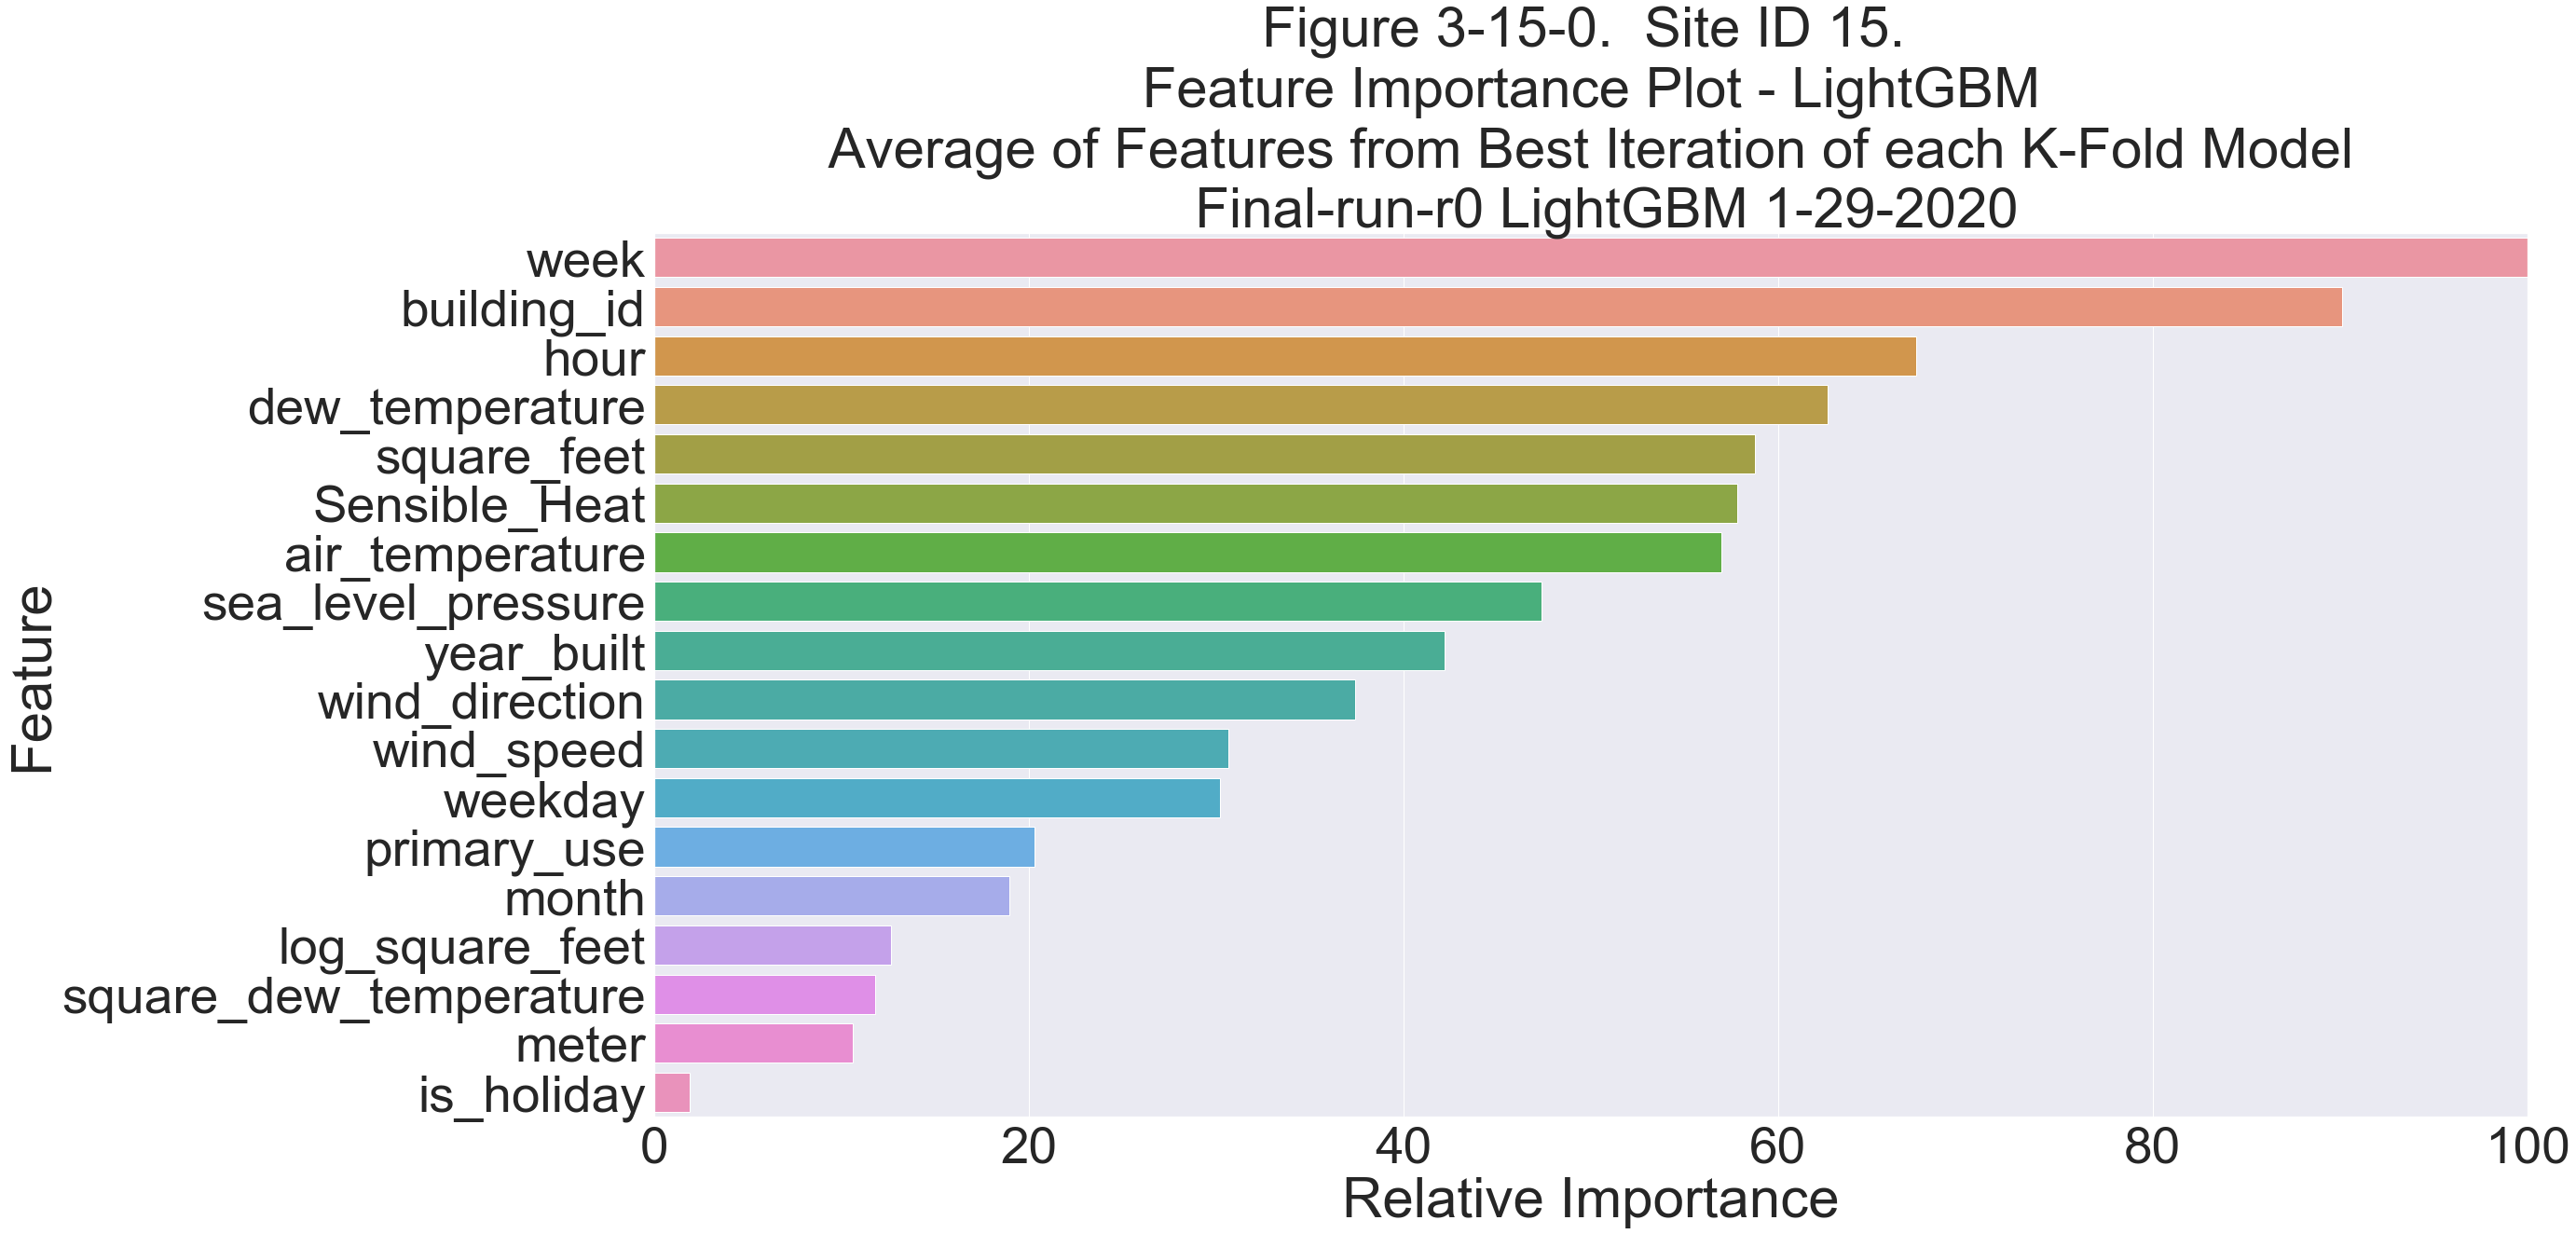

In [77]:
plotImp2(feature_importances_GBM,GBM_features,
         'Figure 3-{}-{}.  Site ID {}. \n Feature Importance Plot - LightGBM \n'
         ' Average of Features from Best Iteration of each K-Fold Model \n  {}'.format(Split_Number_i,i,Split_Number_i,run_type),
         os.path.join(figures_path[Split_Number_i],
         'Figure_3-{}-{}-LightGBM-Best Iteration of each K-Fold Model-FeatureImportancePlot-{}.png'.format(Split_Number_i,i,Split_Number_i,run_type)))

## 3.10 Statistical Analysis of Results<a class="anchor" id="Code_Objective_3_10"></a>

<a id="1"></a> <br>
### **Statistical Regression Evaluation Metrics**

Here are some common evaluation metrics for regression problems:

**Root Mean Squared Logrithmic Error (RMSLE)** is the square root of the mean of the squared logrithmic errors:

\begin{equation*}
RMSLE = \sqrt{\frac{1}{n} \sum_{i=1}^n (\log(y_i + 1) - \log(y_p+1))^2 }
\end{equation*}

**Mean Absolute Error (MAE)** is the mean of the absolute value of the errors:

\begin{equation*}
MAE = \frac{1}{n} \sum_{i=1}^n |(y_{i} - y_{p})|
\end{equation*}

 
**Mean Squared Error (MSE)** is the mean of the squared errors:

\begin{equation*}
MSE = \frac{1}{n} \sum_{i=1}^n (y_{i} - y_{p})^2
\end{equation*}
 
**Root Mean Squared Error (RMSE)** is the square root of the mean of the squared errors:

\begin{equation*}
RMSE = \sqrt{\frac{1}{n} \sum_{i=1}^n (y_{i} - y_{p})^2 }
\end{equation*}

**Comparing these metrics**:

`RMSLE` doesn't penalize huge differences because of the logarithm.  The logarithm helps keep outliers from taking control of the error.  Therefore, it is a good metric when dealing with data that has lots of potential outliers.  

`MAE` is the easiest to interpret, because it's the average of the absolute value of the error.

`MSE` is less easy to interpret becuase of the square, but MSE "punishes" larger errors more than MAE.

`RMSE` is typically used in model performance for meterology, air quality, and climate research studies.  It is easier to interpret than MSE because the units are similar to the prediction values.

These are all lose functions we want to minimize.

### 3.10.1 Regression Plot of Prediction vs. Actual<a class="anchor" id="Code_Objective_3_10_1"></a>

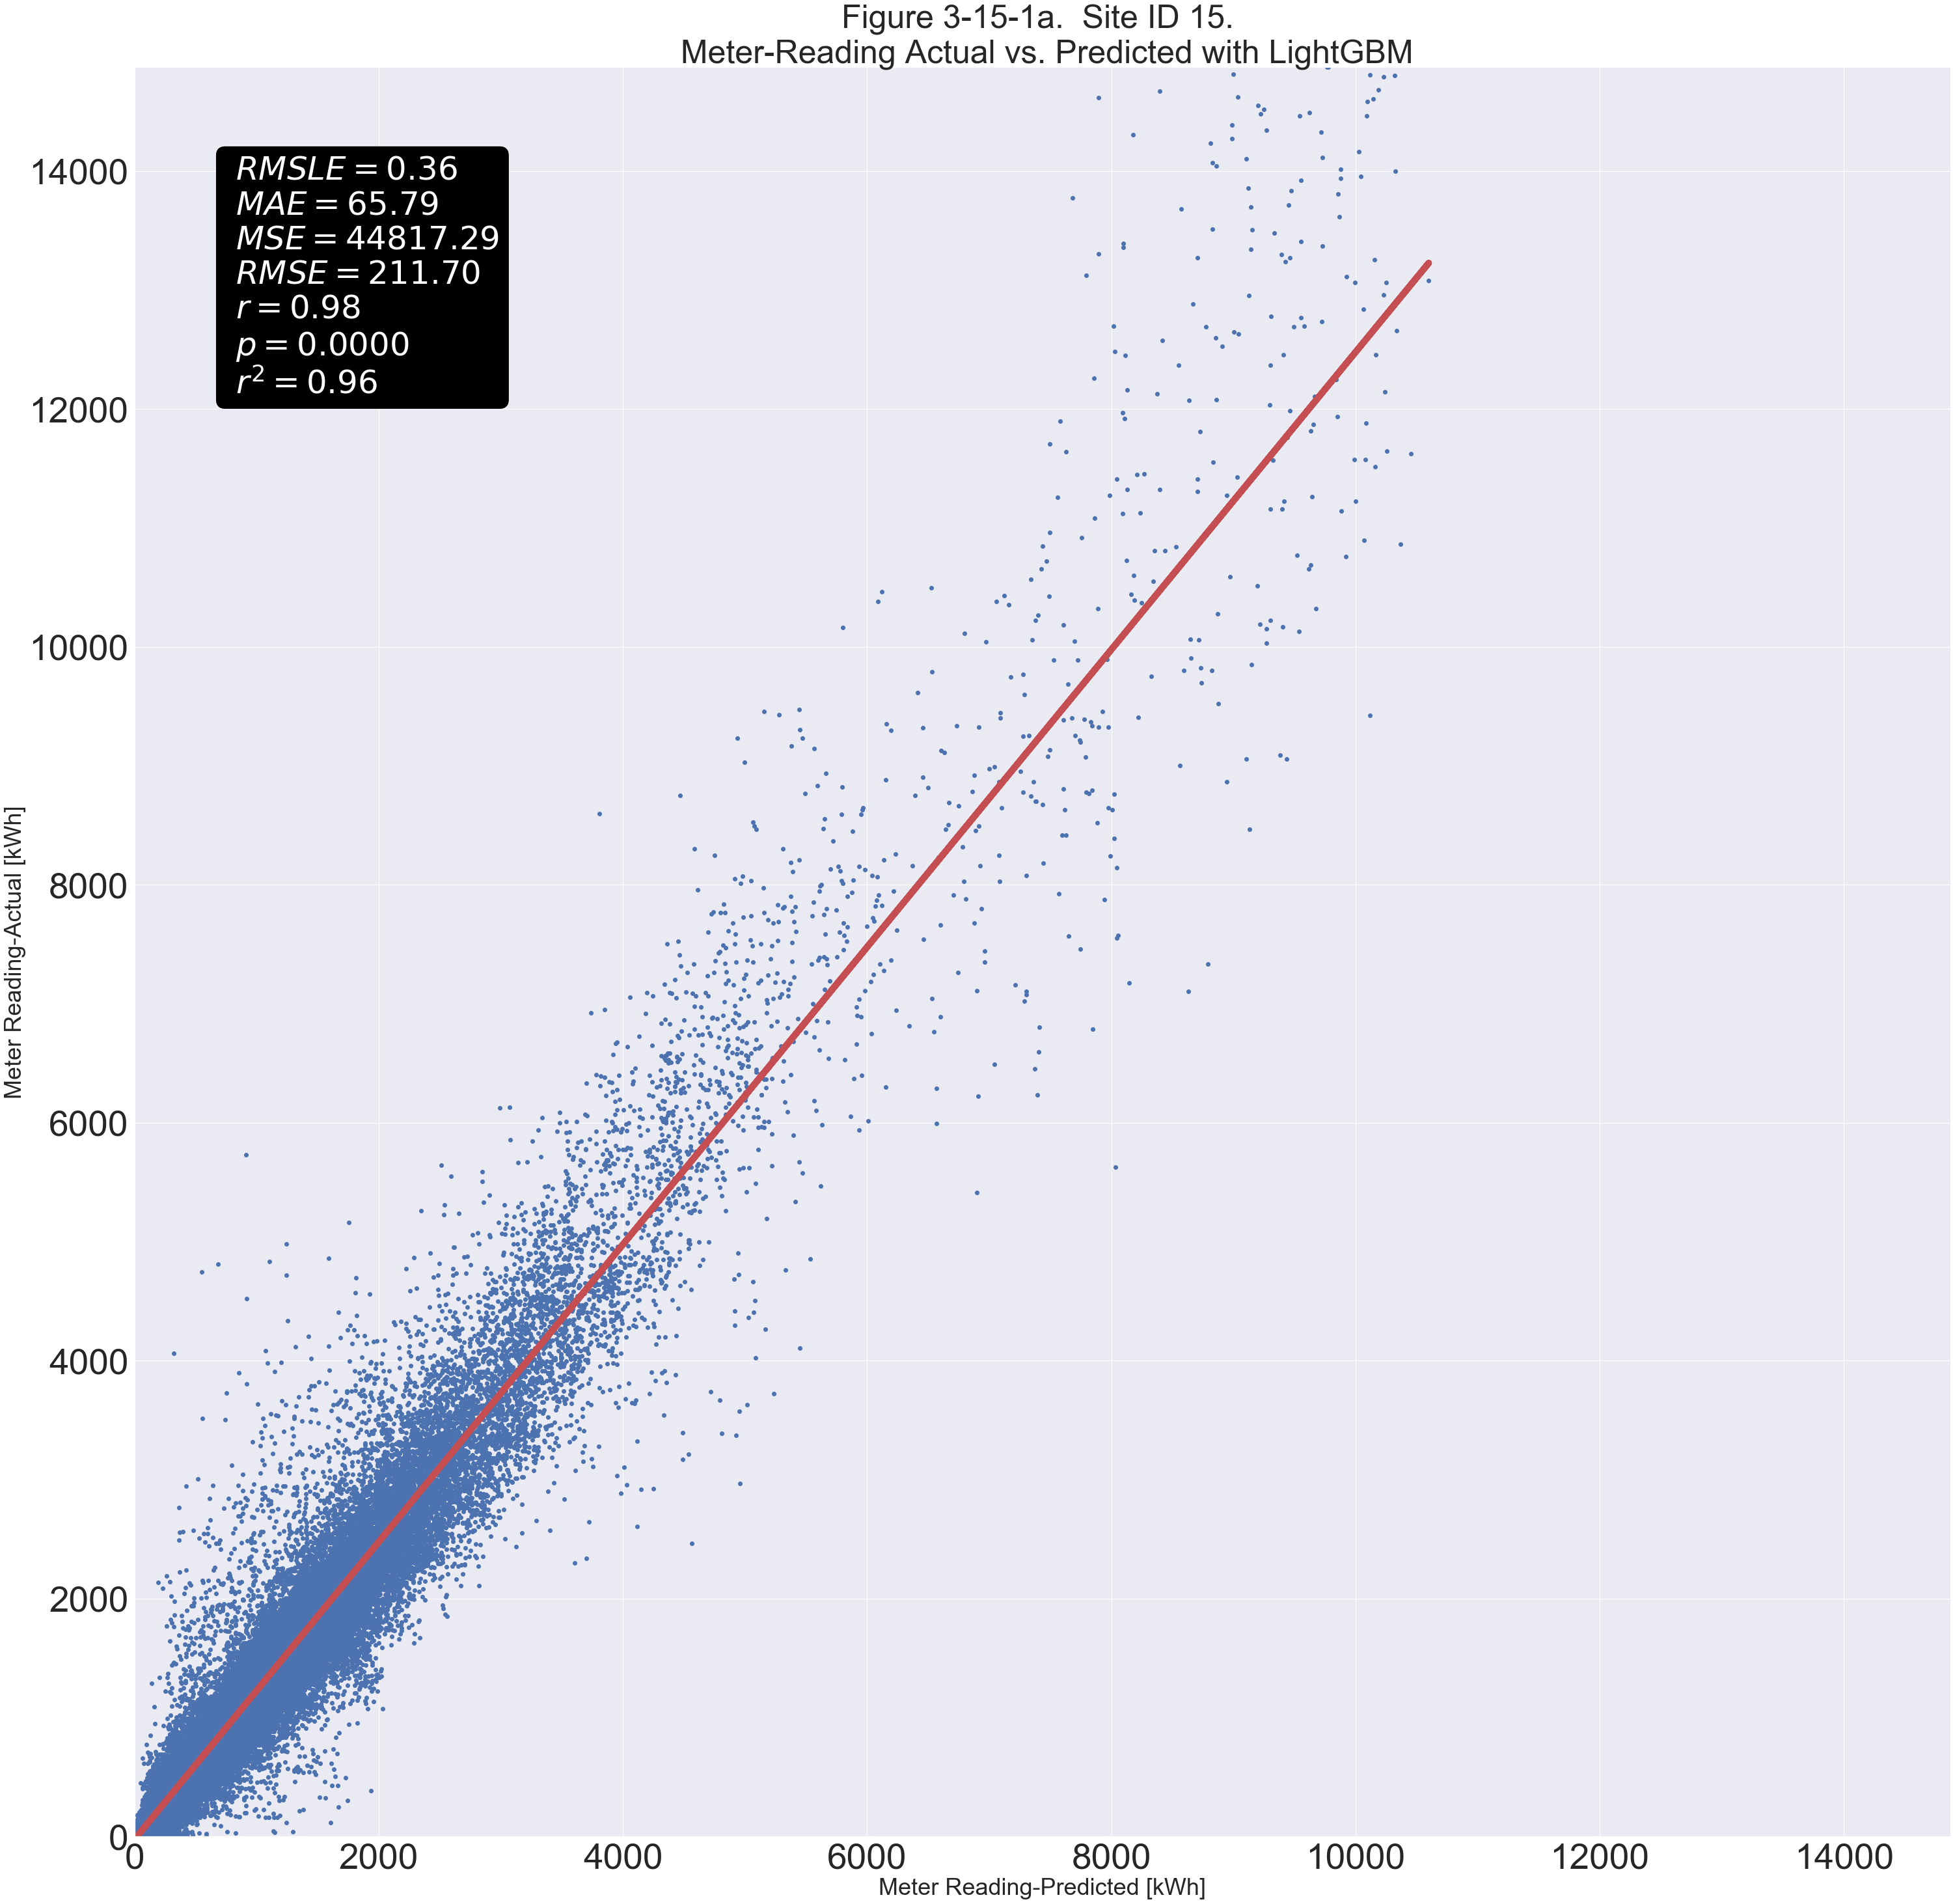

In [78]:
prediction = results
y=np.array(test['meter_reading'].values).astype(float)
X=np.array(prediction)

Xlog=np.log1p(X)
ylog=np.log1p(y)

RMSLE=np.sqrt(metrics.mean_squared_error(ylog, Xlog))
MAE = metrics.mean_absolute_error(y, X)
MSE = metrics.mean_squared_error(y, X)
RMSE = np.sqrt(metrics.mean_squared_error(y, X))

sns.set(font_scale = 5)
fig, axes = plt.subplots(figsize=[50,50])
axes.scatter(X,y)
i=i+1
titleplot = 'Figure 3-{}-{}a.  Site ID {}. \n Meter-Reading Actual vs. Predicted with LightGBM'.format(Split_Number_i,i,Split_Number_i)
plt.title(titleplot,fontsize=50)
plt.xlim(0,max(y))
plt.ylim(0,max(y))

plt.xlabel('Meter Reading-Predicted [kWh]',fontsize=36)
plt.ylabel('Meter Reading-Actual [kWh]',fontsize=36)

linreg = scipy.stats.linregress(X,y)
linreg.slope
y_r=linreg.slope*X+linreg.intercept
x_r=X

axes.plot(x_r,y_r,'r',linewidth=10)

r=linreg.rvalue
p=linreg.pvalue
r2=(linreg.rvalue)**2
textstr = '\n'.join((
    r'$\ RMSLE=%.2f$' % (RMSLE, ),    
    r'$\ MAE=%.2f$' % (MAE, ),
    r'$\ MSE=%.2f$' % (MSE, ),
    r'$\ RMSE=%.2f$' % (RMSE, ),
    r'$\ r=%.2f$' % (r, ),
    r'$\ p=%.4f$' % (p, ),
    r'$\ r^2=%.2f$' % (r2, )))

props = dict(boxstyle='round', facecolor='black', alpha=1.)
axes.text(0.05, 0.95, textstr, transform=axes.transAxes, fontsize=50,
        verticalalignment='top', bbox=props, color='white')

plot_fig = os.path.join(figures_path[Split_Number_i],'Figure 3-{}-{}a. Site ID {}. Meter-Reading Actual vs. Predicted with LightGBM.png'.format(Split_Number_i,i,Split_Number_i))
plt.savefig(plot_fig,dpi=100,bbox_inches='tight')

### 3.10.2 Bland-Altman Plot of Prediction vs. Actual<a class="anchor" id="Code_Objective_3_10_2"></a>

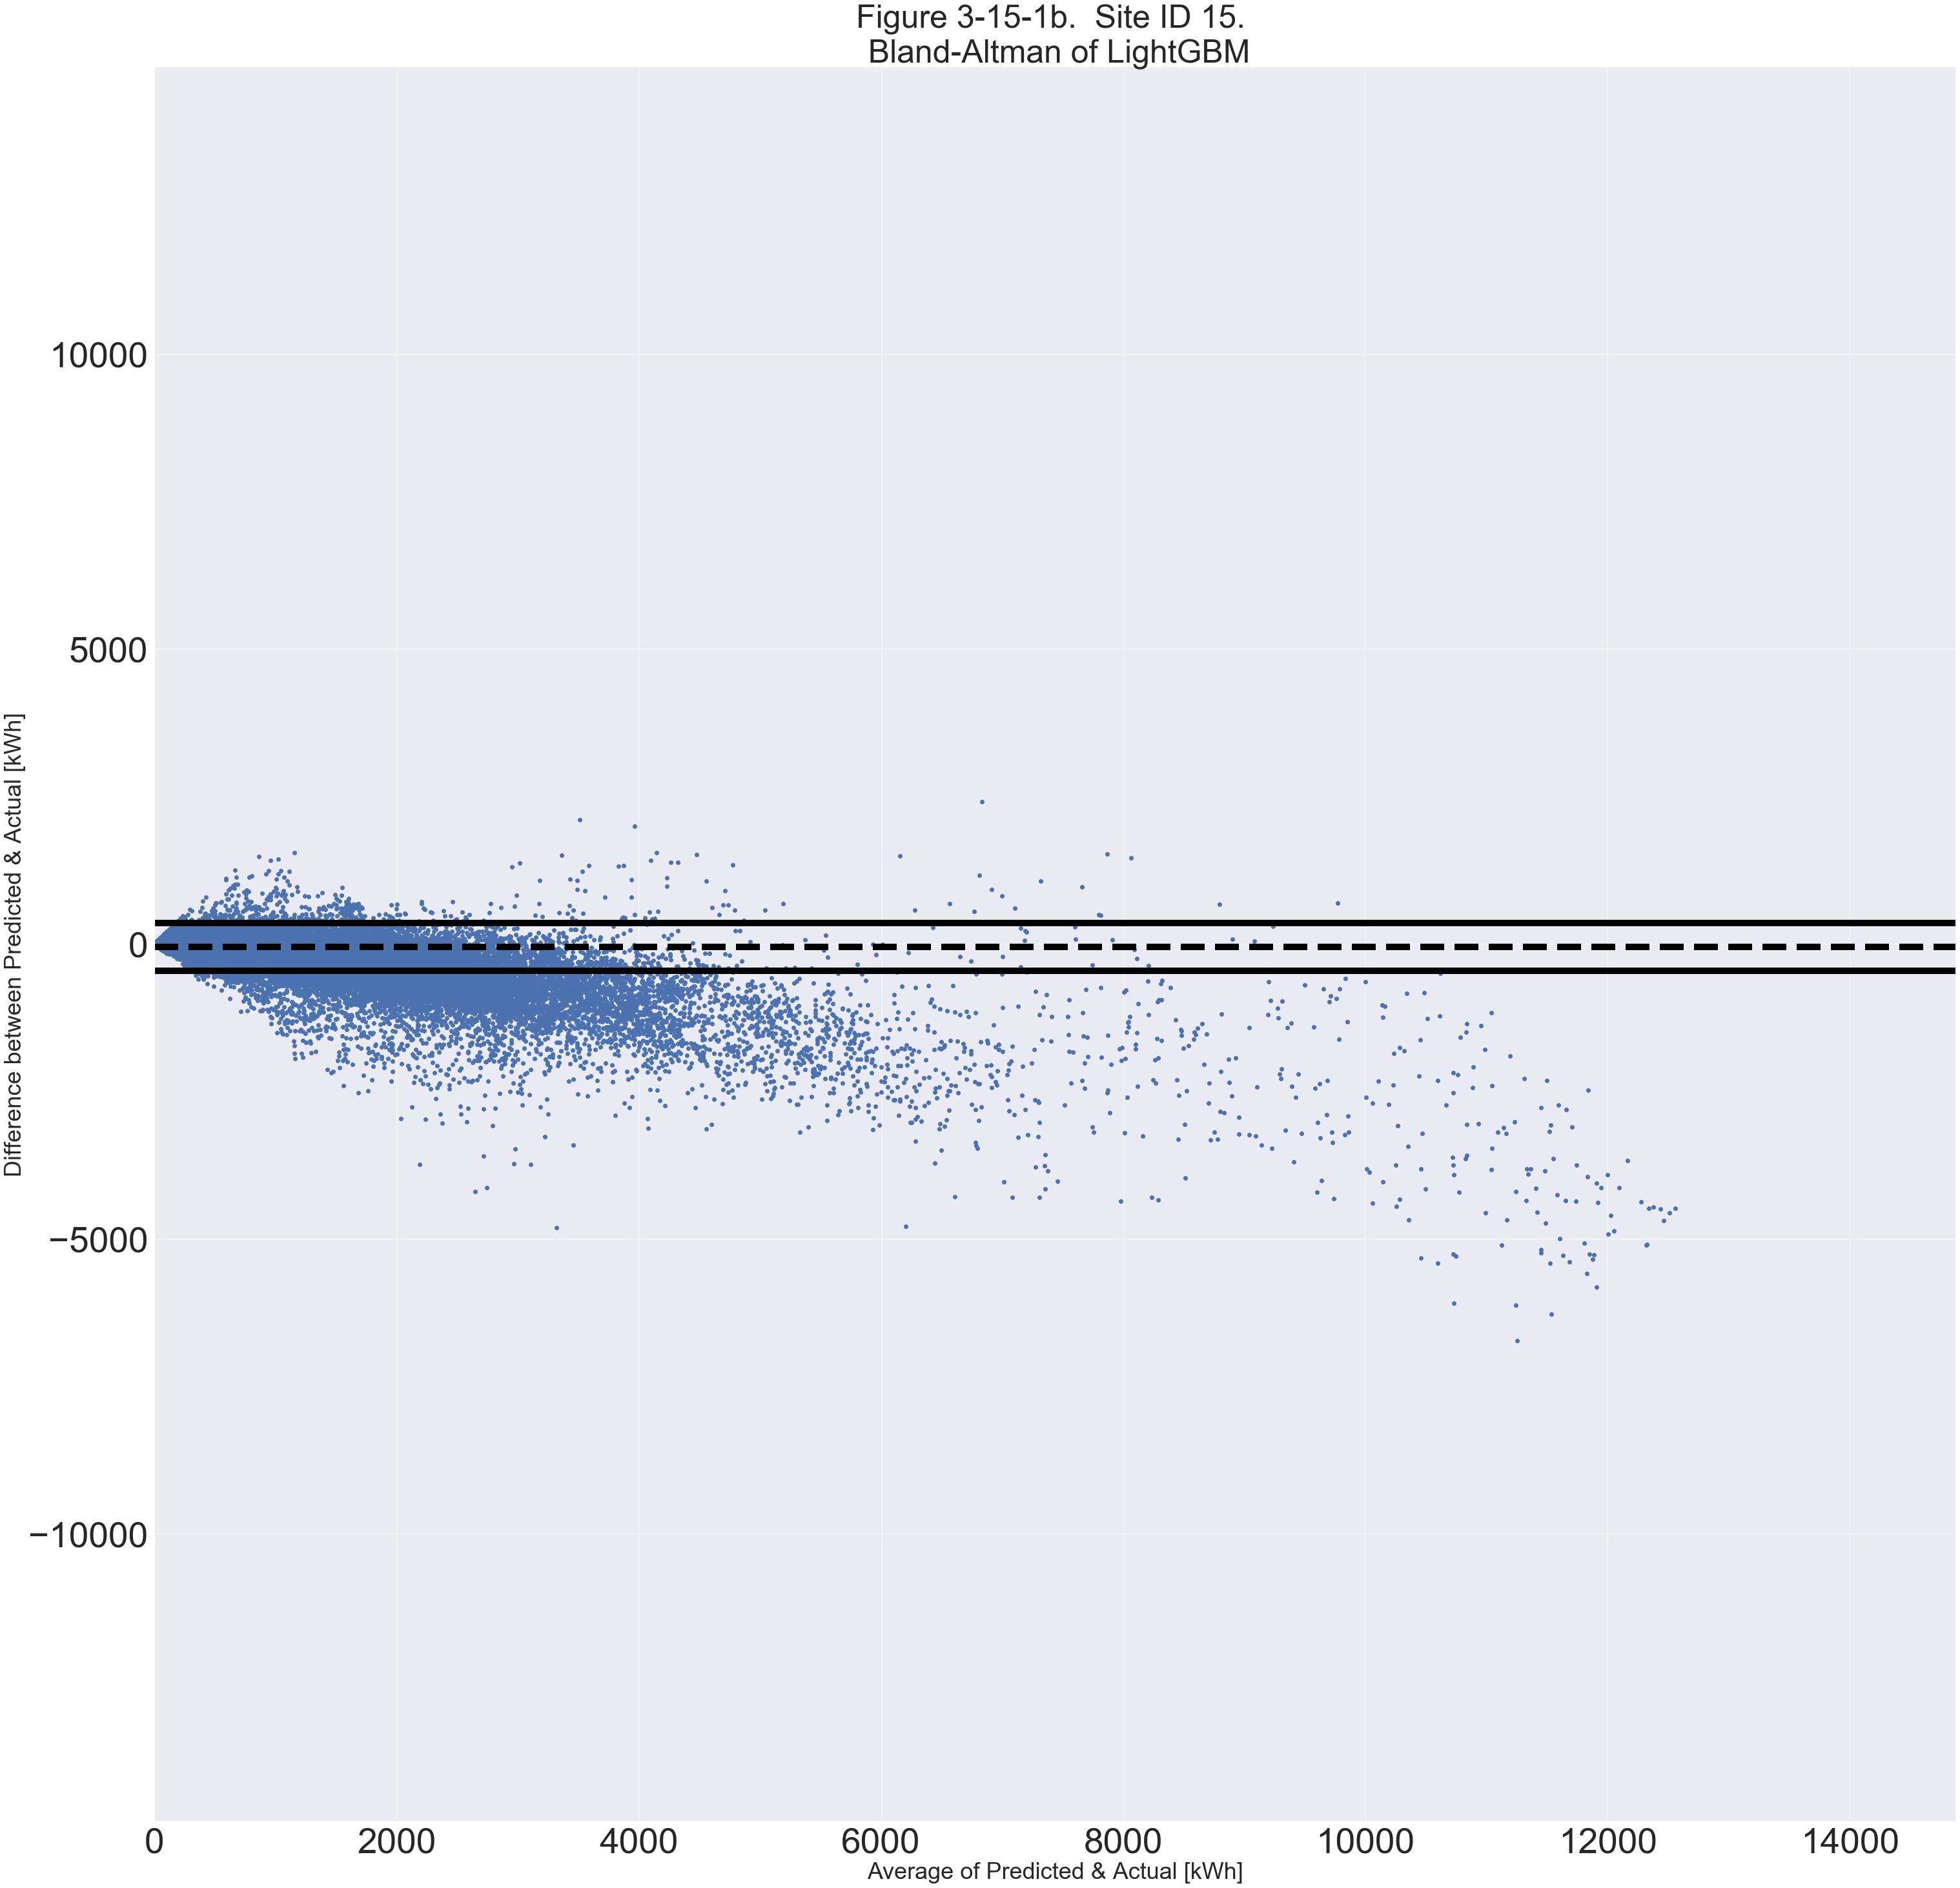

In [79]:
fig, axes = plt.subplots(figsize=[50,50])
plt.xlim(0,max(y))
plt.ylim(-max(y),max(y))
bland_altman_plot(X, y)
titleplot = 'Figure 3-{}-{}b.  Site ID {}. \n Bland-Altman of LightGBM'.format(Split_Number_i,i,Split_Number_i)
plt.title(titleplot,fontsize=50)
plt.ylabel('Difference between Predicted & Actual [kWh]',fontsize=36)
plt.xlabel('Average of Predicted & Actual [kWh]',fontsize=36)
plt.show()

## 3.11 Counterfactual Energy Estimation Scatter Plots<a class="anchor" id="Code_Objective_3_11"></a>

In [80]:
new_results=pd.DataFrame(list(results),columns={'GBM_meter_reading'})
new_results=new_results.set_index(test_Combined.index)
test_Combined=pd.concat([new_results,test_Combined],axis=1)

In [81]:
test_Combined = test_Combined.sort_values(by='timestamp')
train_Combined = train_Combined.sort_values(by='timestamp')
train_Combined=train_Combined.reset_index()
test_Combined=test_Combined.reset_index()

In [82]:
electric_list=all_Combined['building_id'][all_Combined['meter']==0]
electric_list=pd.DataFrame(electric_list.sort_values(ascending=True).unique())
Row_Elec_list=[]
for index, rows in electric_list[-2:-1].iterrows():
    my_list = rows[0]
    Row_Elec_list.append(my_list)

In [83]:
chilledwater_list=all_Combined['building_id'][all_Combined['meter']==1]
chilledwater_list=pd.DataFrame(chilledwater_list.sort_values(ascending=True).unique())
Row_chilledwater_list=[]
for index, rows in chilledwater_list[-2:-1].iterrows():
    my_list = rows[0]
    Row_chilledwater_list.append(my_list)

In [84]:
steam_list=all_Combined['building_id'][all_Combined['meter']==2]
steam_list=pd.DataFrame(steam_list.sort_values(ascending=True).unique())
Row_steam_list=[]
for index, rows in steam_list[-2:-1].iterrows():
    my_list = rows[0]
    Row_steam_list.append(my_list)

In [85]:
hotwater_list=all_Combined['building_id'][all_Combined['meter']==3]
hotwater_list=pd.DataFrame(hotwater_list.sort_values(ascending=True).unique())
Row_hotwater_list=[]
for index, rows in hotwater_list[-2:-1].iterrows():
    my_list = rows[0]
    Row_hotwater_list.append(my_list)

In [86]:
all_Combined=reduce_mem_usage(all_Combined)
all_Combined=all_Combined.reset_index()

Mem. usage decreased to 89.91 Mb (0.0% reduction)


In [87]:
def building_plot(run_type,
                  Row_list,
                  meter_num,
                  meter_name,
                  all_Combined,
                  test_Combined,
                  train_Combined,
                 Fig_num,
                 Alg_name,
                 Alg_col_name,Split_Number_i):
    
    i=0
    for count in list(Row_list):
        fig=plt.subplots(figsize=[70,30])
        plt.title('Figure 3-{}-{}.  Site ID {}.  \n Consumption (kWh) '
                 'for {} Meter Reading '
                 'vs. Time for Building {} \n  {}'. format(Split_Number_i,Fig_num,
                                                   Split_Number_i,
                                                   meter_name,
                                                   count,run_type))
        plt.ylabel('Consumption (kWh)')
        plt.xlabel('Date')

        plt.plot(    test_Combined['timestamp']
                 [(test_Combined['building_id']==count)
                  &(test_Combined['meter']==meter_num)], test_Combined['meter_reading']
                 [(test_Combined['building_id']==count)
                  &(test_Combined['meter']==meter_num)],color='green',linewidth=5,linestyle='--')
        
        plt.plot(    train_Combined['timestamp']
         [(train_Combined['building_id']==count)
          &(train_Combined['meter']==meter_num)], train_Combined['meter_reading']
         [(train_Combined['building_id']==count)
          &(train_Combined['meter']==meter_num)],color='orange',linewidth=5,linestyle='--')


        plt.plot(    test_Combined['timestamp']
                 [(test_Combined['building_id']==count)
                  &(test_Combined['meter']==meter_num)], test_Combined[Alg_col_name]
                 [(test_Combined['building_id']==count)
                  &(test_Combined['meter']==meter_num)],color='blue',linewidth=5,linestyle='--')

        plt.legend([
                    'Testing - Actual Measured Data - Building {} - {}'.format(count,meter_name),
                    'Training/Validation - Actual Measured Data - Building {} - {}'.format(count,meter_name),
                   'Predicted with {}-Counterfactual Model - Building {} - {}'.format(Alg_name, count, meter_name)])
        sns.set(font_scale = 5)
        plt.xlim(min(all_Combined['timestamp']),max(all_Combined['timestamp']))
        plot_fig = os.path.join(figures_path[Split_Number_i],
                                'Figure_3-{}-{}-Site ID {}.Building_{}_{}.png'.format(Split_Number_i,
                                                                                    Fig_num,
                                                                              Split_Number_i,
                                                                              count,
                                                                              meter_name))
        plt.savefig(plot_fig,dpi=100,bbox_inches='tight')
        i=i+1



In [88]:
# daily averaged
x2w=test_Combined.copy()
x2w["timestamp"] = pd.to_datetime(x2w["timestamp"],format="%Y-%m-%d")
x2w=x2w.groupby(['timestamp','meter','building_id']).mean()['meter_reading'] # only groups by those
x2w=pd.DataFrame(x2w).reset_index(level=['timestamp','meter','building_id'])
x2w=x2w.set_index('timestamp')
x2w=x2w.groupby(['building_id','meter']).resample('D').mean()
x2w=x2w.drop(['building_id','meter'],axis=1)
x2w=x2w.reset_index()

x3w=test_Combined.copy()
x3w["timestamp"] = pd.to_datetime(x3w["timestamp"],format="%Y-%m-%d")
x3w=x3w.groupby(['timestamp','meter','building_id']).mean()['GBM_meter_reading'] # only groups by those
x3w=pd.DataFrame(x3w).reset_index(level=['timestamp','meter','building_id'])
x3w=x3w.set_index('timestamp')
x3w=x3w.groupby(['building_id','meter']).resample('D').mean()
x3w=x3w.drop(['building_id','meter'],axis=1)
x3w=x3w.reset_index()

x4w=pd.concat([x2w,x3w['GBM_meter_reading']],axis=1)

# daily averaged
x5w=train_Combined.copy()
x5w["timestamp"] = pd.to_datetime(x5w["timestamp"],format="%Y-%m-%d")
x5w=x5w.groupby(['timestamp','meter','building_id']).mean()['meter_reading'] # only groups by those
x5w=pd.DataFrame(x5w).reset_index(level=['timestamp','meter','building_id'])
x5w=x5w.set_index('timestamp')
x5w=x5w.groupby(['building_id','meter']).resample('D').mean()
x5w=x5w.drop(['building_id','meter'],axis=1)
x5w=x5w.reset_index()

### 3.11.1 Counterfactual Energy Estimation Building Plots by Meter<a class="anchor" id="Code_Objective_3_11_1"></a>

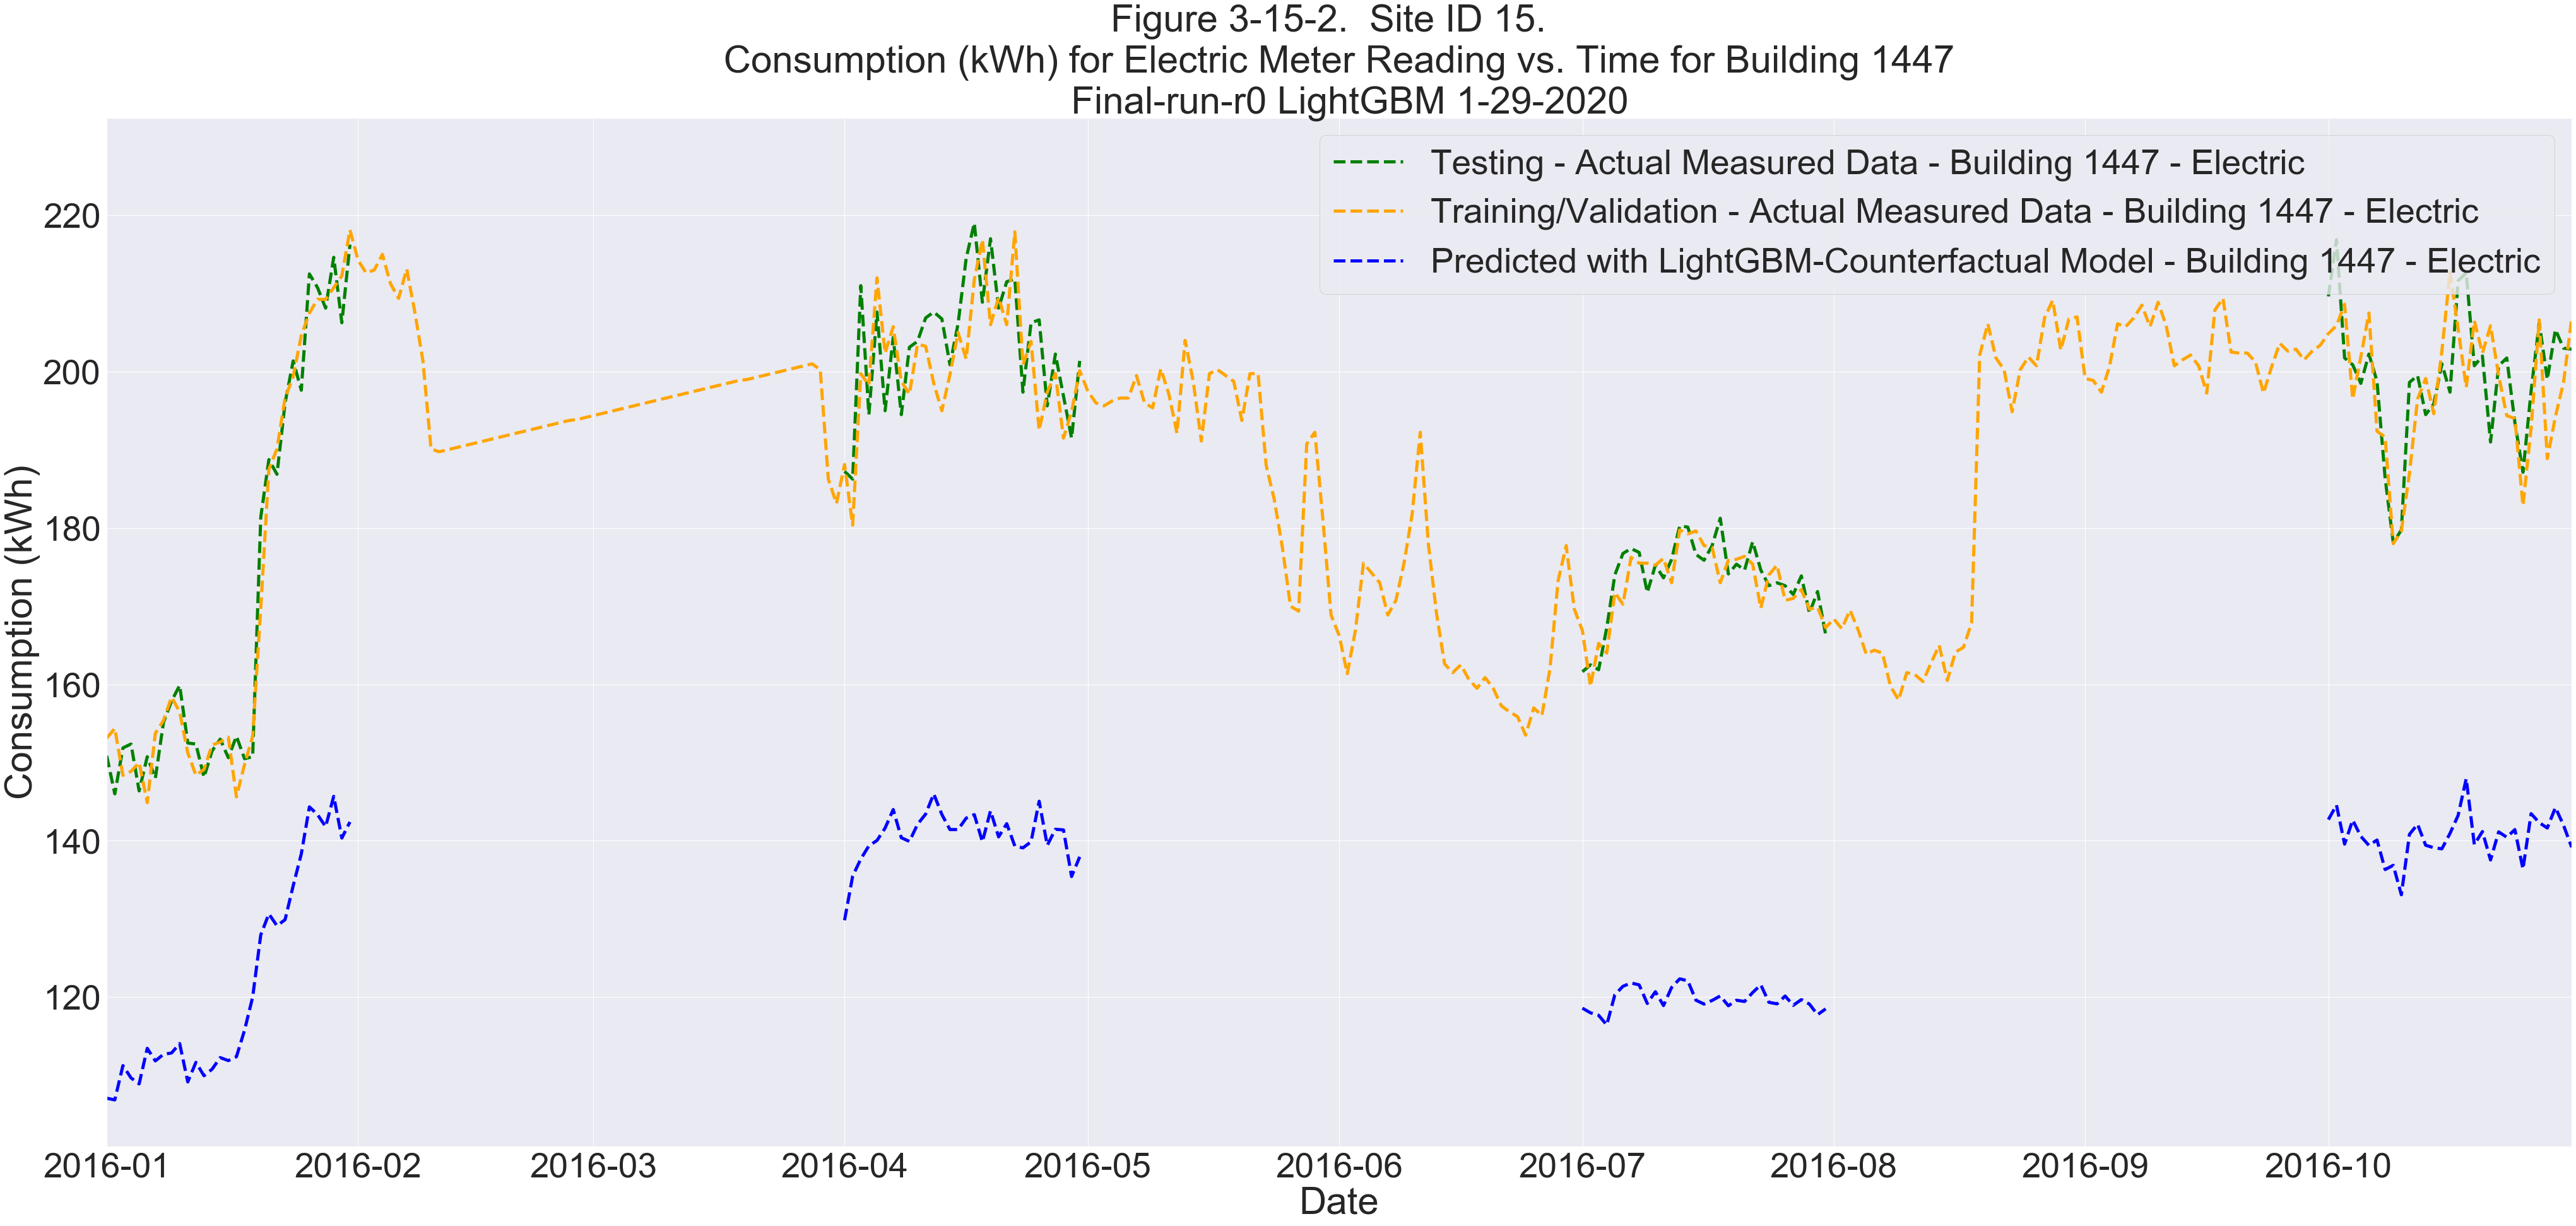

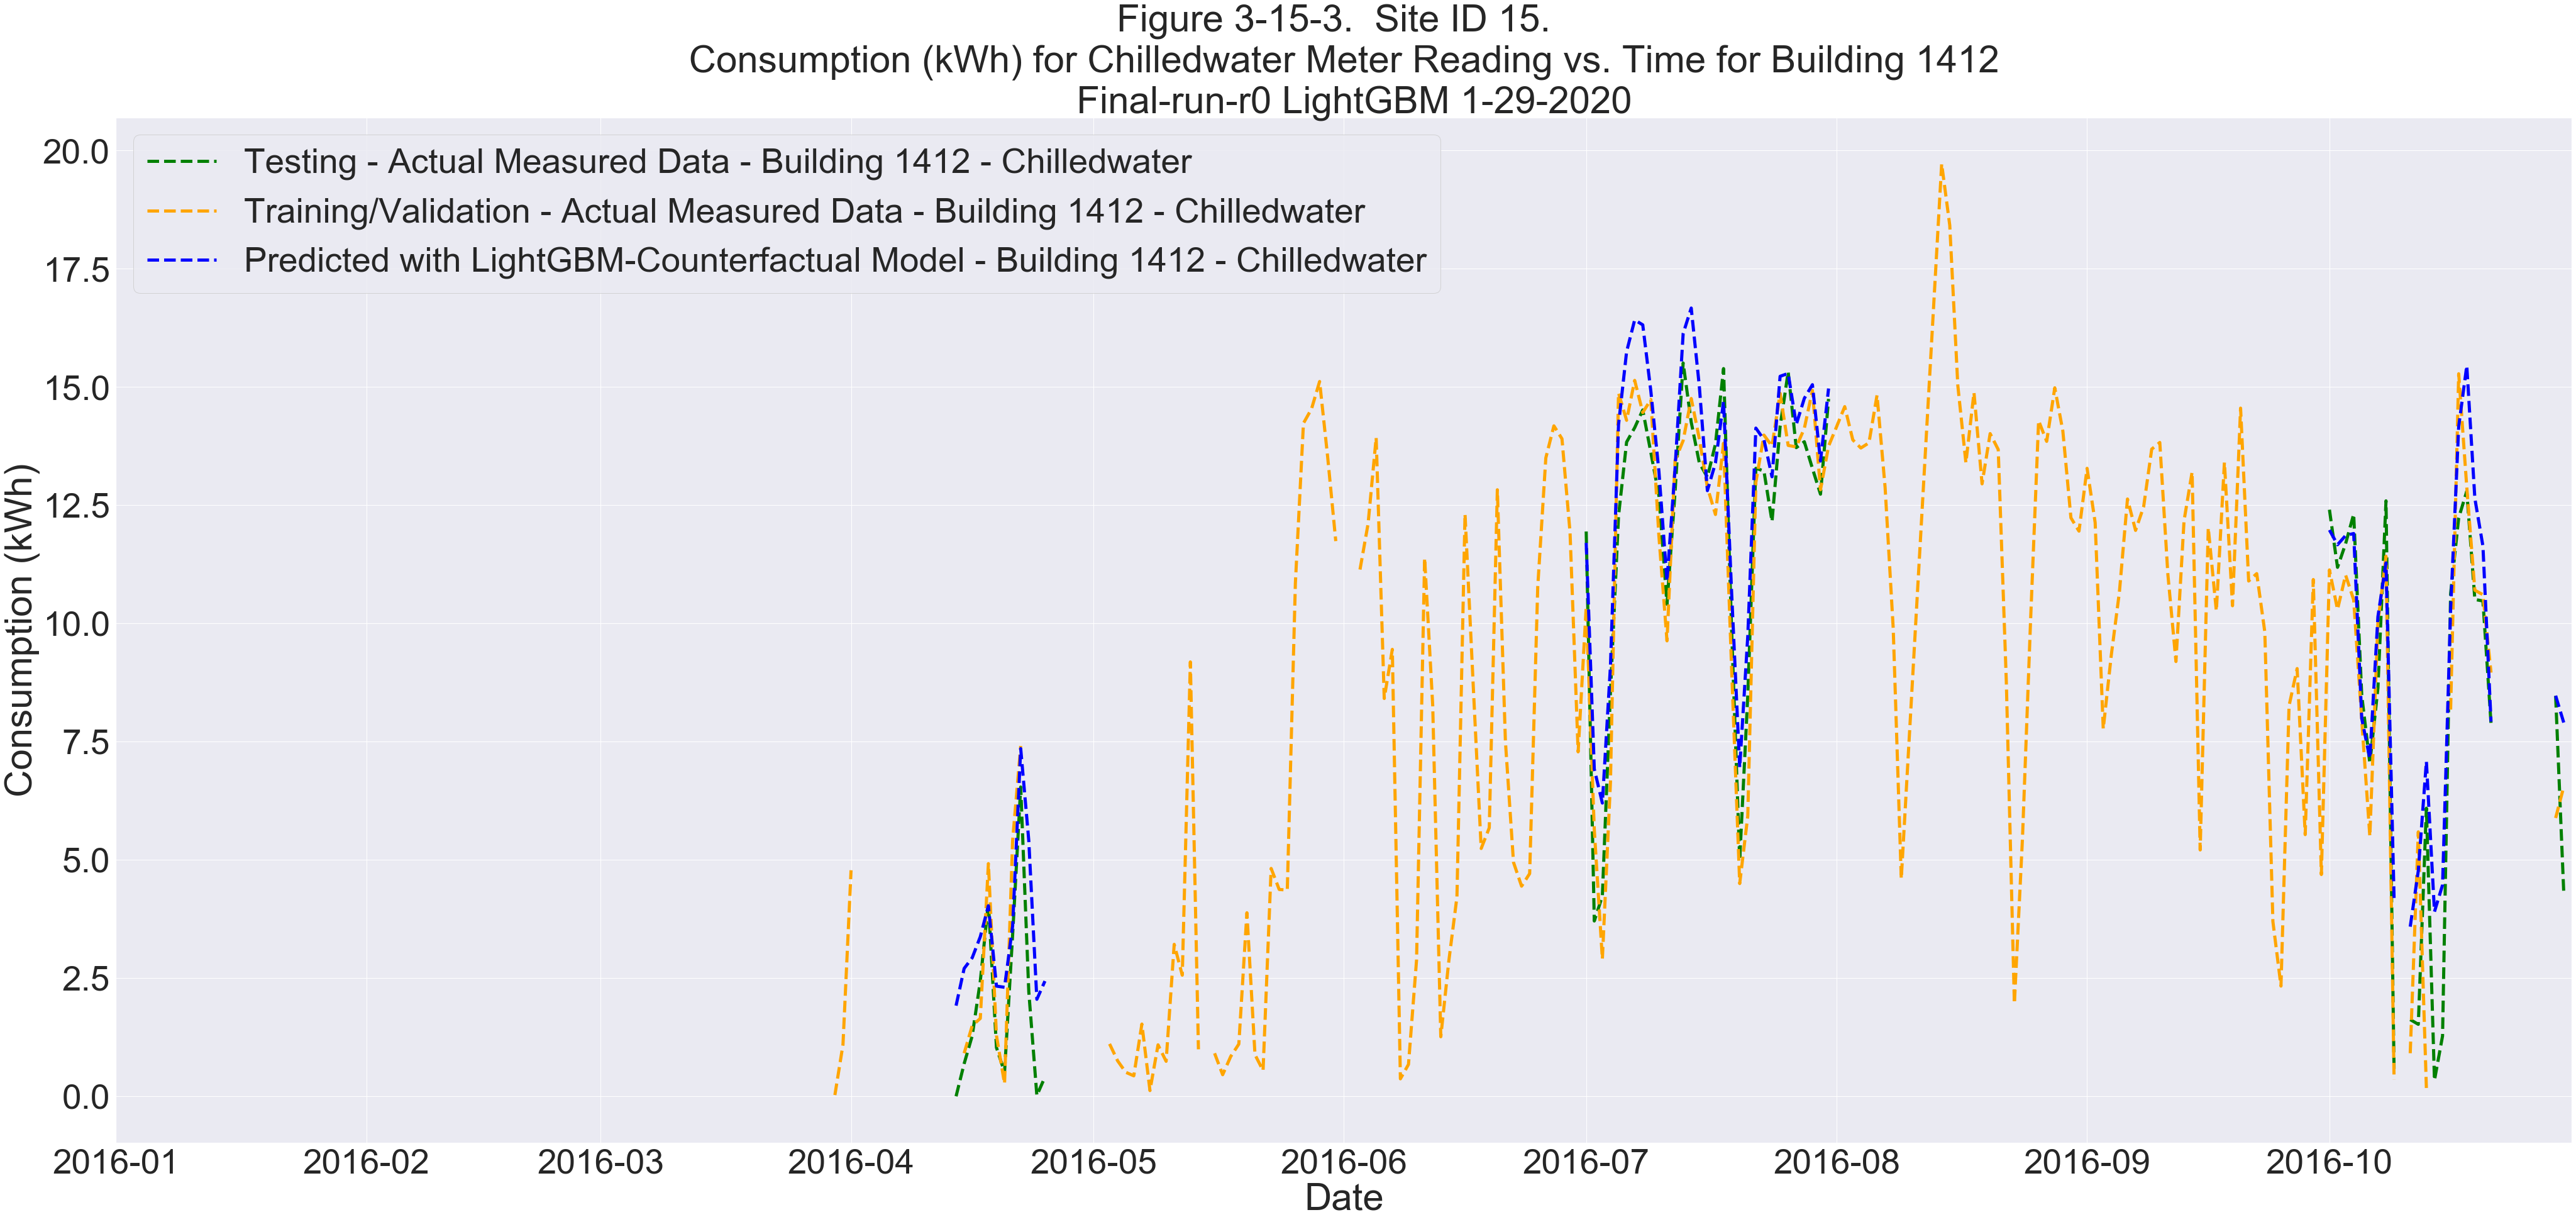

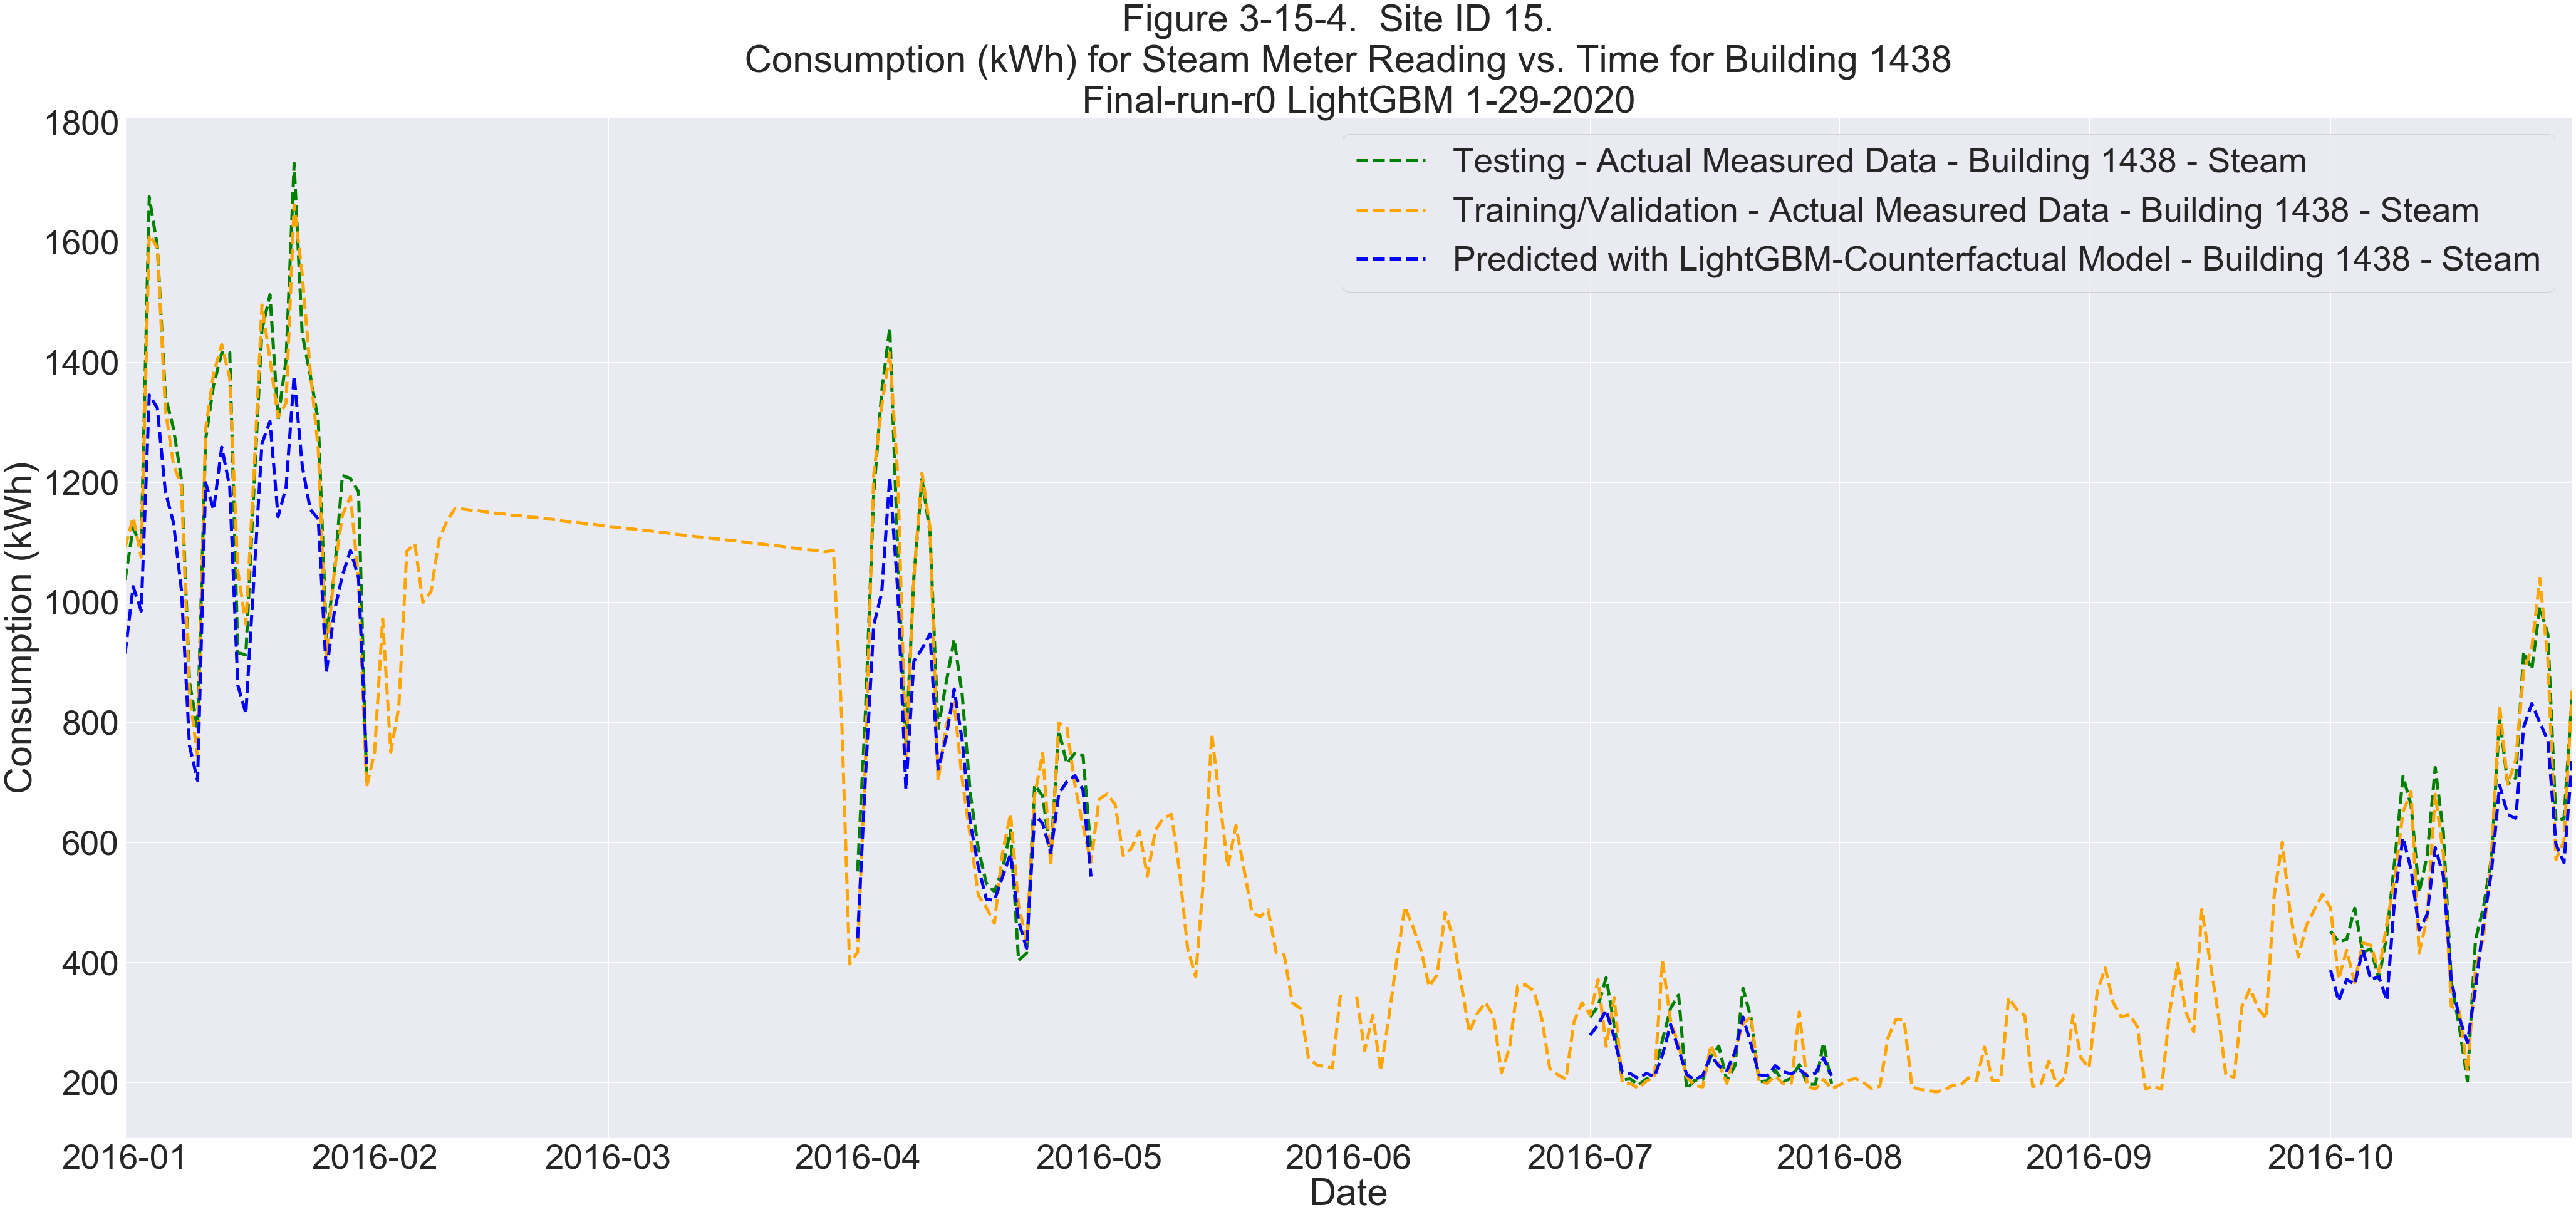

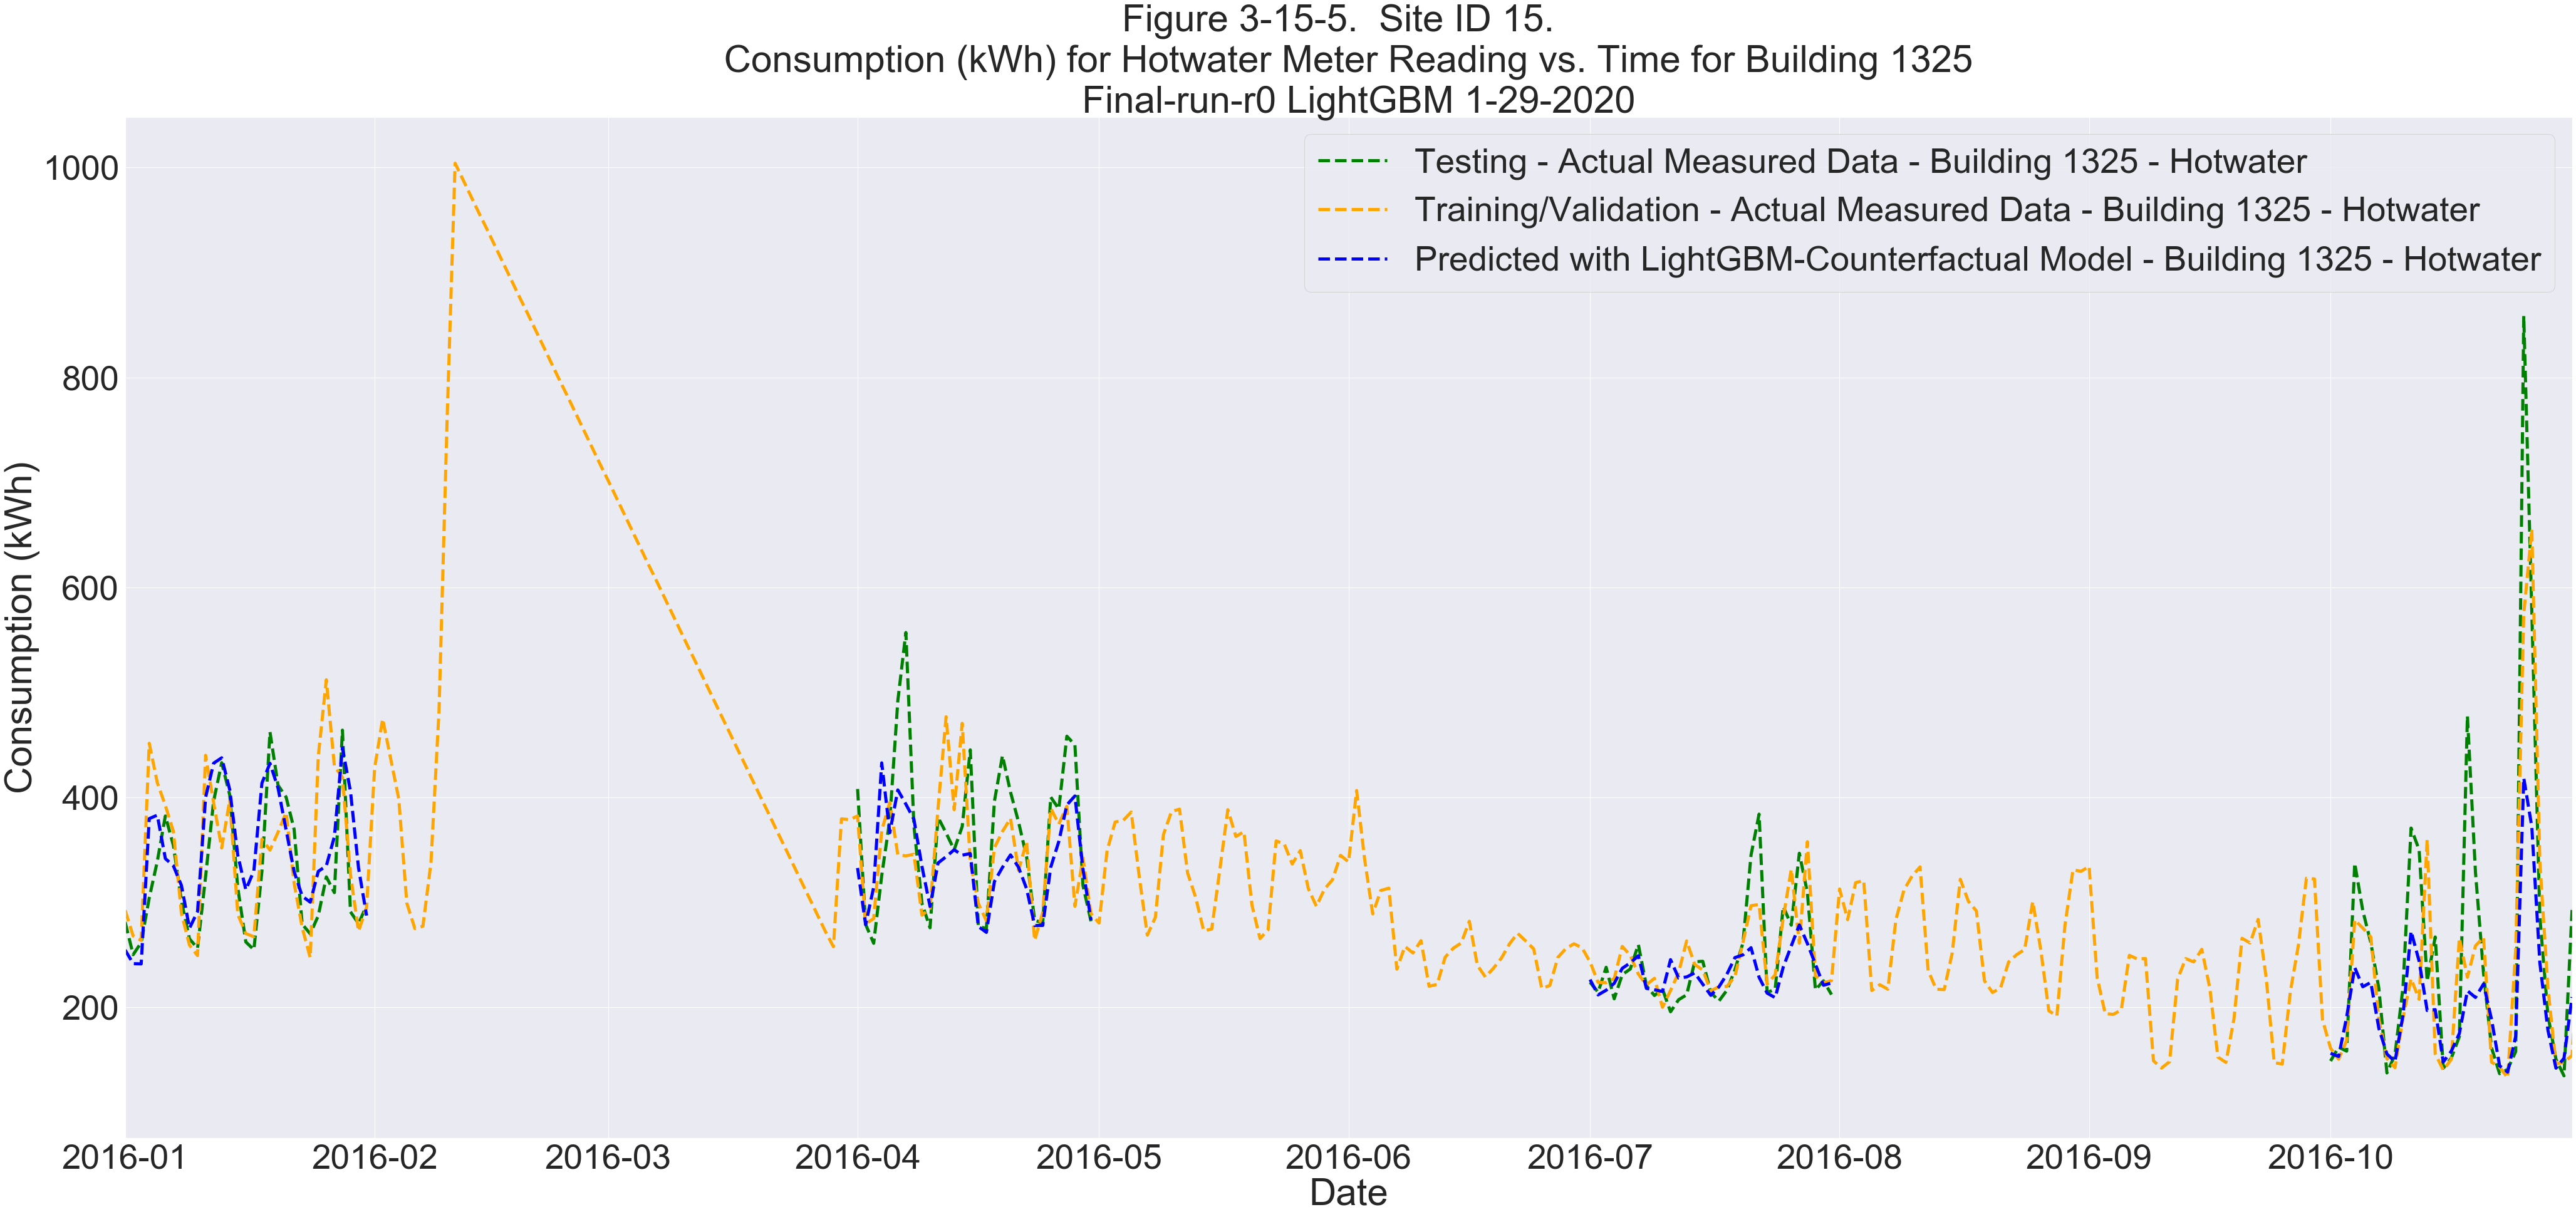

In [89]:
i=i+1
building_plot(run_type,Row_Elec_list,0,'Electric',
              x2w,x4w,x5w,'{}'.format(i),
              'LightGBM','GBM_meter_reading',Split_Number_i)
i=i+1
building_plot(run_type,Row_chilledwater_list,1,'Chilledwater',
              x2w,x4w,x5w,'{}'.format(i),
              'LightGBM','GBM_meter_reading',Split_Number_i)
i=i+1
building_plot(run_type,Row_steam_list,2,'Steam',
              x2w,x4w,x5w,'{}'.format(i),
              'LightGBM','GBM_meter_reading',Split_Number_i)
i=i+1
building_plot(run_type,Row_hotwater_list,3,'Hotwater',
              x2w, x4w,x5w,'{}'.format(i),
              'LightGBM','GBM_meter_reading',Split_Number_i)

### 3.11.2 Counterfactual Energy Estimation Plots by Meter<a class="anchor" id="Code_Objective_3_11_2"></a>

In [90]:
def avg_building_plot(run_type,
                      meter_num,
                  meter_name,
                  x2,
                  x3,x4,
                 Fig_num,
                 Alg_name,
                 Alg_col_name,Split_Number_i):
    
    fig = plt.subplots(figsize=[70,30])
    plt.title('Figure 3-{}.  Site ID {}. \n Consumption (kWh) for All Buildings '
              'for {} Meter Reading '
              'vs. Time \n {}'.format(Fig_num,Split_Number_i,meter_name,run_type))

    plt.ylabel('Consumption (kWh)')
    plt.xlabel('Date')


    plt.plot(x2['timestamp']
             [(x2['meter']==meter_num)],x2['meter_reading']
             [(x2['meter']==meter_num)],color='green',linewidth=5,linestyle='--')
    
    plt.plot(x4['timestamp']
             [(x4['meter']==meter_num)],x4['meter_reading']
             [(x4['meter']==meter_num)],color='orange',linewidth=5,linestyle='--')

    plt.plot(x3['timestamp']
             [(x3['meter']==meter_num)],x3[Alg_col_name]
             [(x3['meter']==meter_num)],color='blue',linewidth=5,linestyle='--')



    plt.legend(['Testing-Actual Measured Data for all buildings - {}'.format(meter_name),
                'Training/Validation-Actual Measured Data for all buildings - {}'.format(meter_name),
               'Predicted with {}-Counterfactual Model for all buildings - {}'.format(Alg_name,meter_name)])
    sns.set(font_scale = 3)
    plt.xlim(min(all_Combined['timestamp']),max(all_Combined['timestamp']))
    plot_fig = os.path.join(figures_path[Split_Number_i],'Figure_3-{}-Split ID {}. Daily Averaged for All Buildings-{}.png'.format(Fig_num,Split_Number_i,meter_name))
    plt.savefig(plot_fig,dpi=100,bbox_inches='tight')

In [91]:
# daily averaged
x2w=test_Combined.copy()
x2w["timestamp"] = pd.to_datetime(x2w["timestamp"],format="%Y-%m-%d")
x2w=x2w.groupby(['timestamp','meter']).mean()['meter_reading'] # only groups by those
x2w=pd.DataFrame(x2w).reset_index(level=['timestamp','meter'])
x2w=x2w.set_index('timestamp')
x2w=x2w.groupby(['meter']).resample('D').mean()
x2w=x2w.drop(['meter'],axis=1)
x2w=x2w.reset_index()

# daily averaged
x3w=test_Combined.copy()
x3w["timestamp"] = pd.to_datetime(x3w["timestamp"],format="%Y-%m-%d")
x3w=x3w.groupby(['timestamp','meter']).mean()['GBM_meter_reading'] # only groups by those
x3w=pd.DataFrame(x3w).reset_index(level=['timestamp','meter'])
x3w=x3w.set_index('timestamp')
x3w=x3w.groupby(['meter']).resample('D').mean()
x3w=x3w.drop(['meter'],axis=1)
x3w=x3w.reset_index()

# daily averaged
x4w=train_Combined.copy()
x4w["timestamp"] = pd.to_datetime(x4w["timestamp"],format="%Y-%m-%d")
x4w=x4w.groupby(['timestamp','meter']).mean()['meter_reading'] # only groups by those
x4w=pd.DataFrame(x4w).reset_index(level=['timestamp','meter'])
x4w=x4w.set_index('timestamp')
x4w=x4w.groupby(['meter']).resample('D').mean()
x4w=x4w.drop(['meter'],axis=1)
x4w=x4w.reset_index()

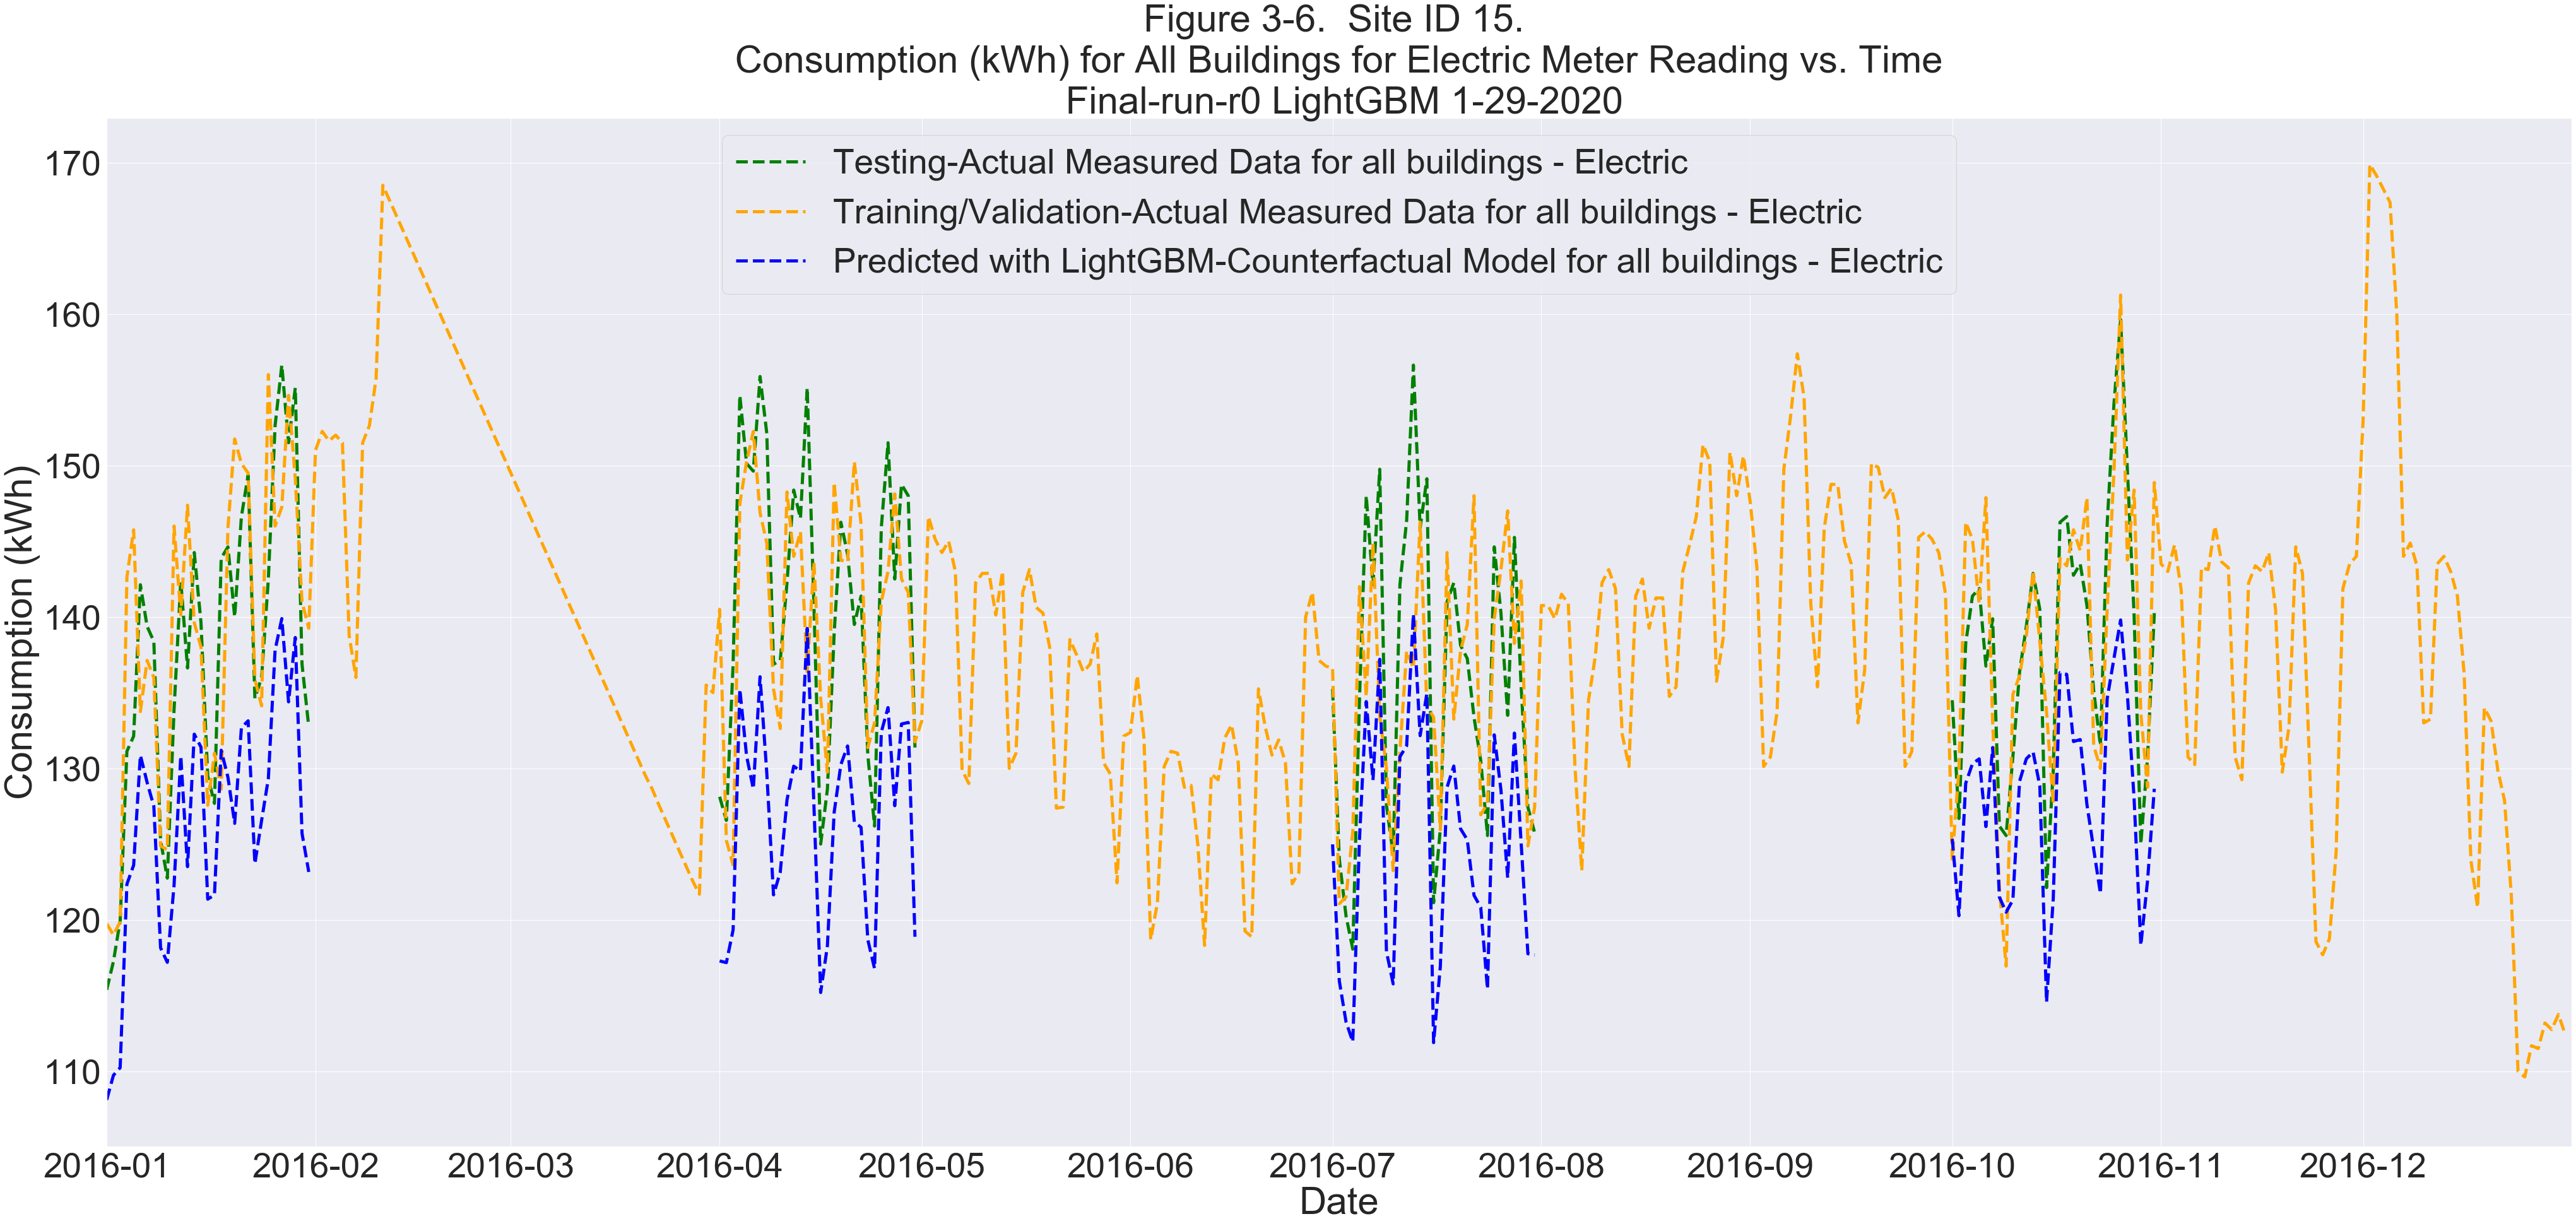

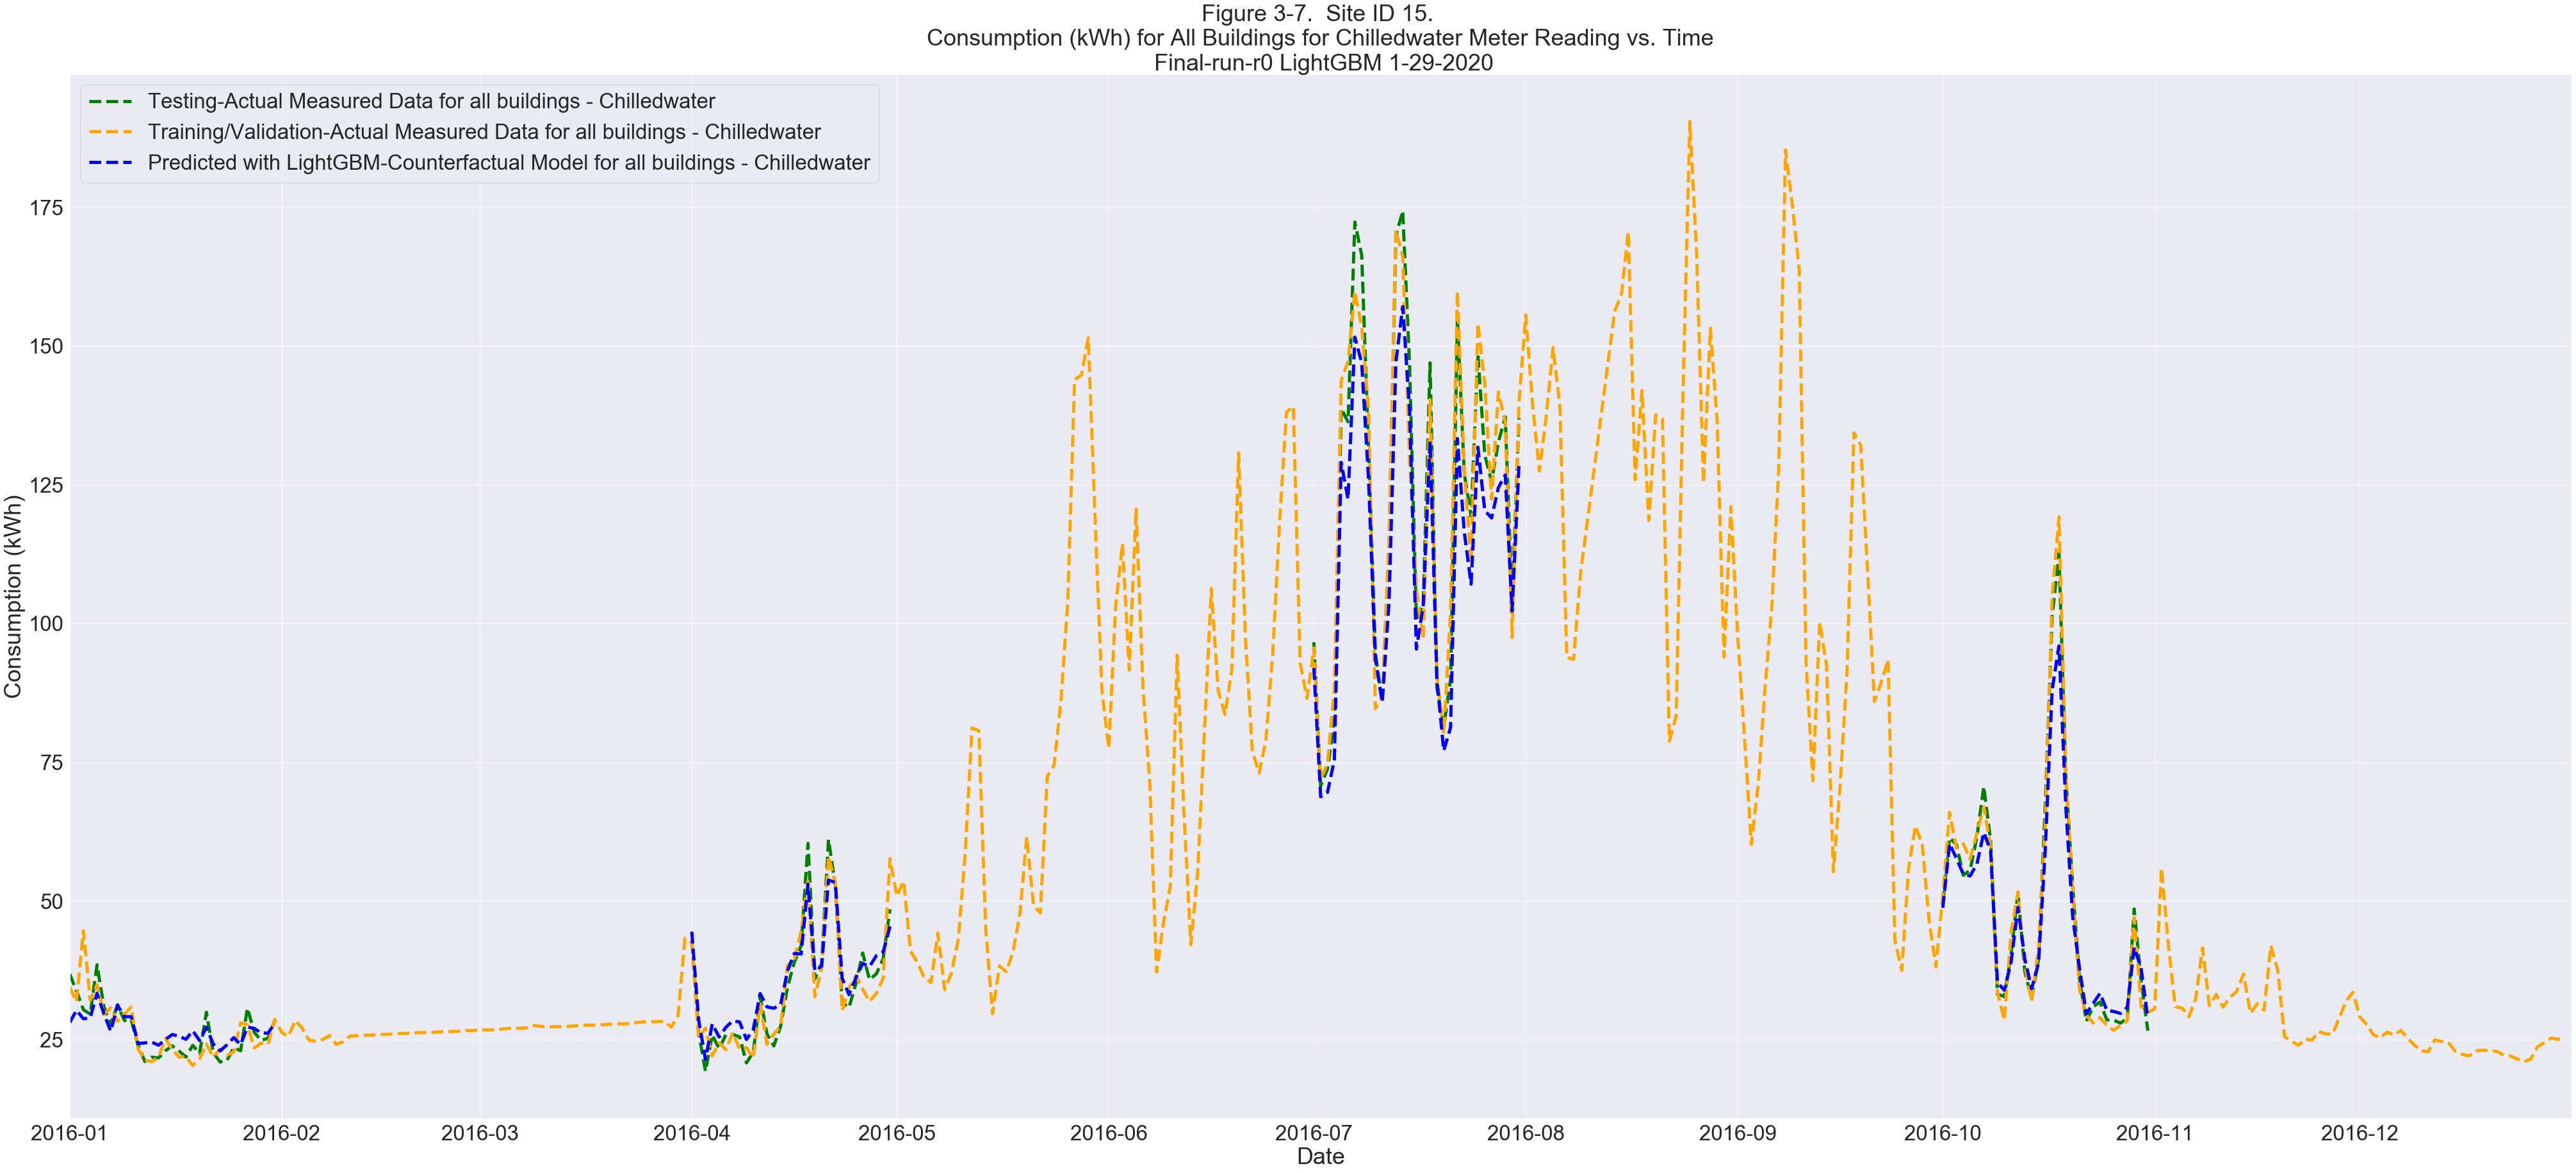

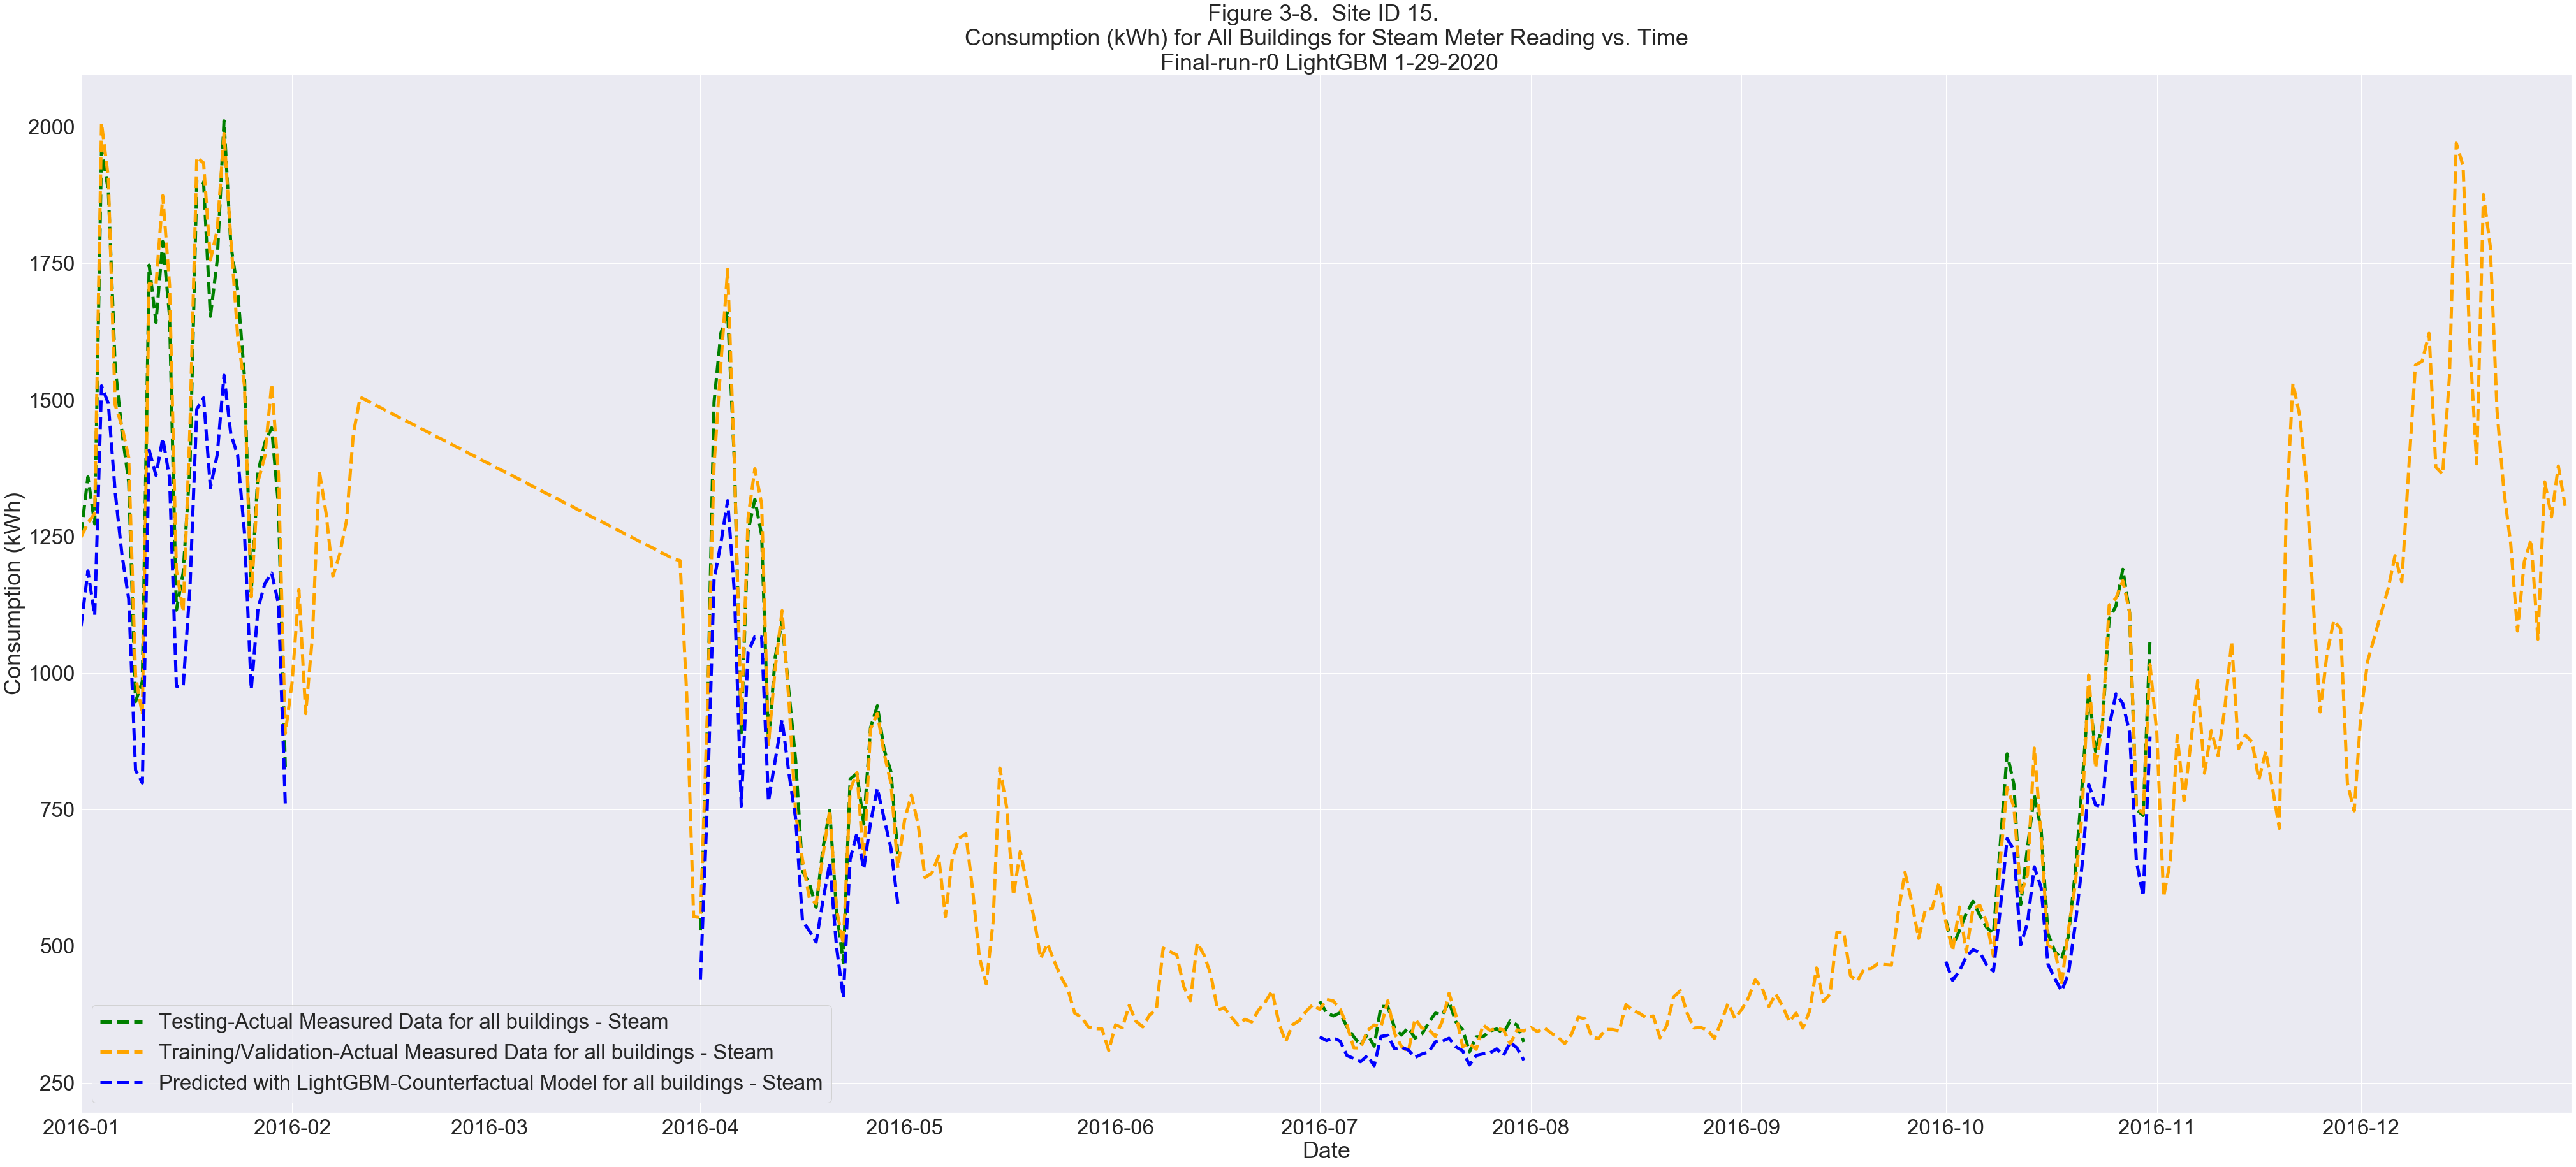

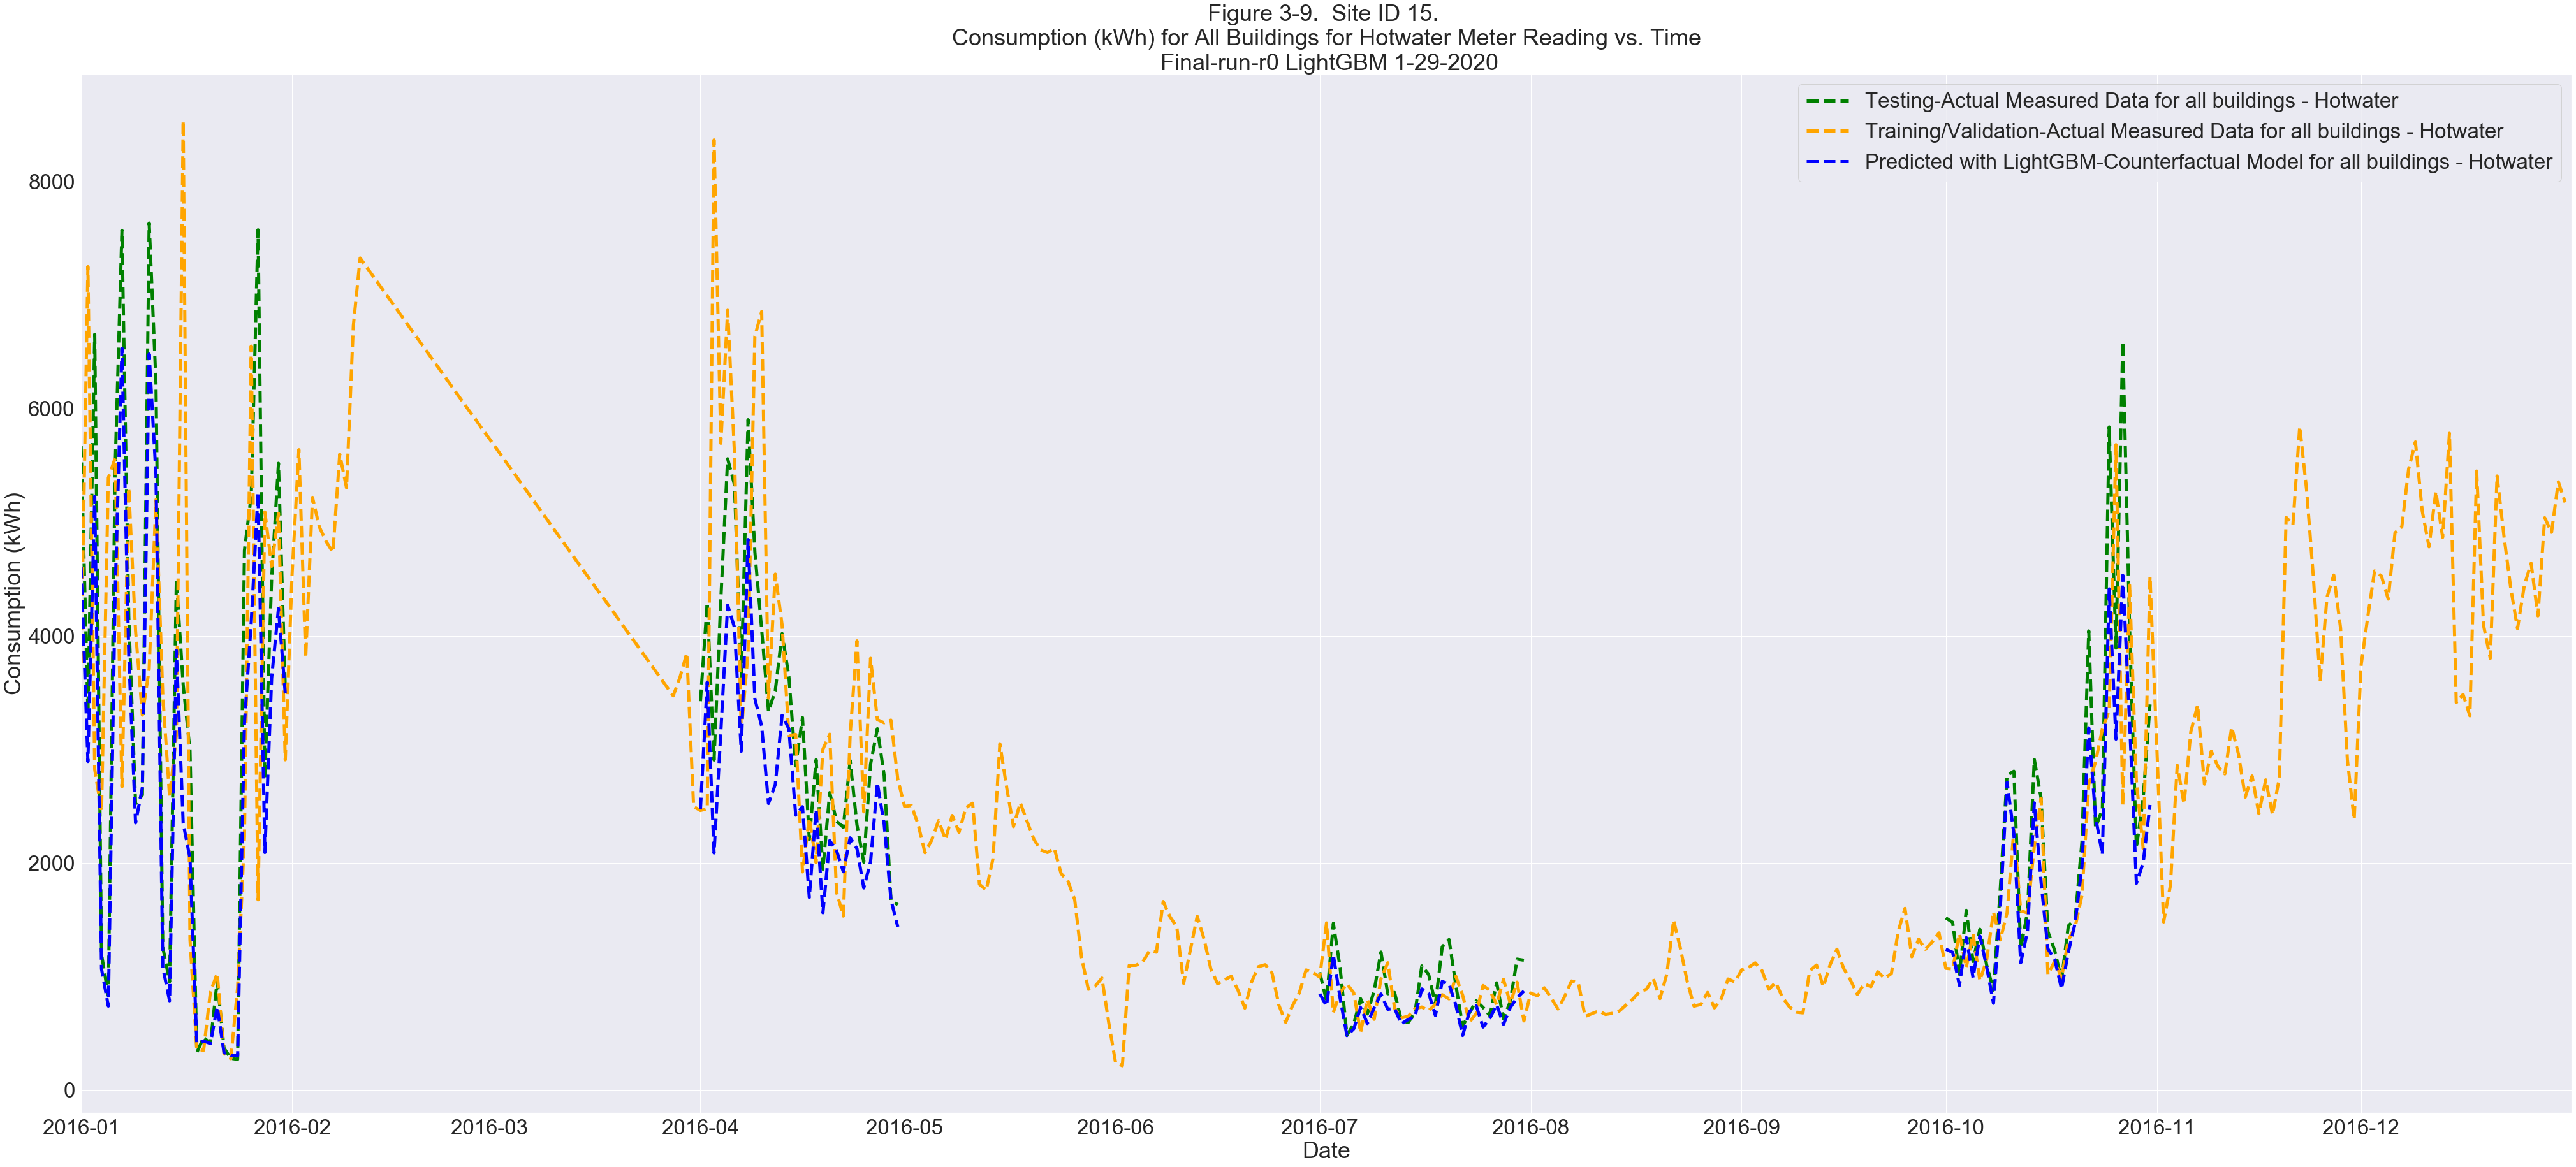

In [92]:
i=i+1
avg_building_plot(run_type,0,'Electric',x2w,x3w,x4w,'{}'.format(i),
              'LightGBM','GBM_meter_reading',Split_Number_i)
i=i+1
avg_building_plot(run_type,1,'Chilledwater',x2w,x3w,x4w,'{}'.format(i),
              'LightGBM','GBM_meter_reading',Split_Number_i)
i=i+1
avg_building_plot(run_type,2,'Steam',x2w,x3w,x4w,'{}'.format(i),
              'LightGBM','GBM_meter_reading',Split_Number_i)
i=i+1
avg_building_plot(run_type,3,'Hotwater',x2w,x3w,x4w,'{}'.format(i),
              'LightGBM','GBM_meter_reading',Split_Number_i)

## 3.12 Export Models<a class="anchor" id="Code_Objective_3_12"></a>

In [93]:
count=0
for Split_Number in list(Splits):  
    if count == Split_Number_i:
        joblib.dump(models,os.path.join(models_path[count],'models.pkl'))
        train_Combined.to_csv(os.path.join(OUTPUT_split_path[count],'train_Combined_Site_ID_{}.csv'.format(count)))
        test_Combined.to_csv(os.path.join(OUTPUT_split_path[count],'test_Combined_Site_ID_{}.csv'.format(count)))
        print(os.path.join(models_path[count],'model.pkl'))
    count+=1

/Volumes/Data/BigData/ASHRAE/Outputs/Site_ID_15/Models/model.pkl


In [94]:
del train, test, final_test, features_for_test, features_for_train
gc.collect()

25576

## 3.13 Predict on Unknown Future Test Data<a class="anchor" id="Code_Objective_3_13"></a>

In [95]:
results = []
for model in models:
    if  results == []:
        results = np.expm1(model.predict(features_for_final_test, num_iteration=model.best_iteration)) / len(models)
    else:
        results += np.expm1(model.predict(features_for_final_test, num_iteration=model.best_iteration)) / len(models)

## 3.14 Export Final Results for Site ID<a class="anchor" id="Code_Objective_3_14"></a>

In [96]:
new_results=pd.DataFrame(list(results),columns={'GBM_meter_reading'})
new_results=new_results.set_index(final_test_Combined.index)
final_test_Combined=pd.concat([new_results,final_test_Combined],axis=1)

if Split_Number_i == 0:
    final_test_Combined.loc[(final_test_Combined['site_id'] == 0) & (final_test_Combined['meter'] == 0),
              'GBM_meter_reading'] = final_test_Combined[(final_test_Combined['site_id'] == 0) & (final_test_Combined['meter'] == 0)]['GBM_meter_reading'] * 3.4118

submission = pd.DataFrame({"row_id": final_test_Combined['original_index'], "meter_reading": final_test_Combined['GBM_meter_reading']})

submission = submission.sort_values(by='row_id')

submission.to_csv(os.path.join(OUTPUT_split_path[Split_Number_i],"Site_ID_{}_submission_GBM.csv".format(Split_Number_i)), 
                  index=False, 
                  float_format="%.4f")